In [2]:
import pandas as pd 
import seaborn as sns
import os
import numpy as np
import openpyxl
pd.set_option('display.max_columns', None)

In [12]:
#Getting tab names

path = 'Case_Nordea/Common Data Warehouse.xlsx'


In [35]:
# Defining functions

def cleanData(df):
    df.columns = df.columns.str.replace('/','_').str.replace(" ", "_").str.replace('-', '_').str.replace('%','pct').str.replace(' / ','_').str.replace(' - ', '_')
    df.columns = df.columns.str.replace('__','_').str.replace('___','_').str.replace('__','_')
    #strip and adjust column names 
    #df = df.iloc[2:].drop(columns= np.nan).astype('float')
    return df


def DF_fromTabs_Excel(path):

    df_list = []
    df_names = []
    
    from openpyxl import load_workbook
    path = 'Case_Nordea/Common Data Warehouse.xlsx'
    wb = load_workbook(path, read_only=True, keep_links=False)
    lst = wb.sheetnames

    for tab in lst:
        name = tab.replace(' ','_')
        df = pd.read_excel(path, sheet_name=tab)
        df = cleanData(df)
        df_list.append(df)
        df_names.append(name)
        df_dict = {k:v for k,v in zip(df_names, df_list)}
    print(f'Access through the following keys: {df_names}')
    return df_dict 


In [36]:
df_dict = DF_fromTabs_Excel(path)

Access through the following keys: ['Customer', 'Instrument', 'Financial', 'GL', 'Group_GL']


In [44]:
df_names = ['Customer', 'Instrument', 'Financial', 'GL', 'Group_GL']

lst_columns = []

for name in df_names:
    lst_columns.append(df_dict[name].columns.tolist())
    print(df_dict[name].columns.tolist())


['Customer_ID', 'Local_Customer_ID', 'Customer_Name', 'NACE_Code_L1', 'NACE_Name_L1', 'NACE_Code', 'Bankrupcy_Flag', 'Rating_Score', 'Country', 'Customer_Responsible_Unit', 'Sector_Code', 'Sector_Name']
['Agreement_ID', 'Account_Number', 'Account_Number_Old', 'Performing_Non_Performing', 'Effective_Date', 'Closing_Date', 'Maturity_Date', 'Registration_Date', 'Country', 'Basel_FT_ID', 'Last_Repricing_Date', 'Agreement_Purpose', 'Amortization_Method']
['Agmt_ID', 'GL_Acct_ID', 'Source', 'Cust_ID', 'Amount']
['GL_Account_ID', 'GL_Account', 'GL_Name', 'Group_GL_Acct_ID', 'GL_Account_Type', 'GL_Account_Name']
['Group_GL_Account_ID', 'Group_GL_Account', 'Group_GL_Name']


In [45]:
#Renaming df "Financial"
df_dict['Financial'] = df_dict['Financial'].rename(columns ={'Agmt_ID':'Agreement_ID', 'GL_Acct_ID':'GL_Account_ID', 'Cust_ID':'Customer_ID'})

In [48]:
df_dict['GL'] = df_dict['GL'].rename(columns= {'Group_GL_Acct_ID':'Group_GL_Account_ID'})

In [50]:
df_names = ['Customer', 'Instrument', 'Financial', 'GL', 'Group_GL']

lst_columns = []

for name in df_names:
    lst_columns.append(df_dict[name].columns.tolist())
    print(df_dict[name].columns.tolist())

['Customer_ID', 'Local_Customer_ID', 'Customer_Name', 'NACE_Code_L1', 'NACE_Name_L1', 'NACE_Code', 'Bankrupcy_Flag', 'Rating_Score', 'Country', 'Customer_Responsible_Unit', 'Sector_Code', 'Sector_Name']
['Agreement_ID', 'Account_Number', 'Account_Number_Old', 'Performing_Non_Performing', 'Effective_Date', 'Closing_Date', 'Maturity_Date', 'Registration_Date', 'Country', 'Basel_FT_ID', 'Last_Repricing_Date', 'Agreement_Purpose', 'Amortization_Method']
['Agreement_ID', 'GL_Account_ID', 'Source', 'Customer_ID', 'Amount']
['GL_Account_ID', 'GL_Account', 'GL_Name', 'Group_GL_Account_ID', 'GL_Account_Type', 'GL_Account_Name']
['Group_GL_Account_ID', 'Group_GL_Account', 'Group_GL_Name']


In [51]:
# Check for the same column names

def find_same_values(lists):
    # Create an empty dictionary to store the results
    results = {}
    # Iterate over each list in the input list of lists
    for i, lst1 in enumerate(lists):
        # Iterate over each list again, starting from the next list
        for j, lst2 in enumerate(lists[i+1:], i+1):
            # Find the common values between the two lists
            common_values = set(lst1) & set(lst2)
            # Iterate over the common values
            for value in common_values:
                # Add the value to the results dictionary
                if value in results:
                    results[value].append((i, j))
                else:
                    results[value] = [(i, j)]
    # Return the results
    return results



In [52]:
same_columns = find_same_values(lst_columns)
same_columns

{'Country': [(0, 1)],
 'Customer_ID': [(0, 2)],
 'Agreement_ID': [(1, 2)],
 'GL_Account_ID': [(2, 3)],
 'Group_GL_Account_ID': [(3, 4)]}

In [53]:
# saving a dict as pickle

import pickle 

with open('df_dict.pkl', 'wb') as f:
    pickle.dump(df_dict, f)

In [ ]:
#Checking the data types, 

In [60]:
for name in df_names:
    print('\n',name)
    df_dict[name].info()


 Customer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6763 entries, 0 to 6762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_ID                6763 non-null   int64  
 1   Local_Customer_ID          6763 non-null   object 
 2   Customer_Name              5367 non-null   object 
 3   NACE_Code_L1               6544 non-null   object 
 4   NACE_Name_L1               6524 non-null   object 
 5   NACE_Code                  6089 non-null   float64
 6   Bankrupcy_Flag             6308 non-null   float64
 7   Rating_Score               5454 non-null   object 
 8   Country                    6308 non-null   object 
 9   Customer_Responsible_Unit  6293 non-null   float64
 10  Sector_Code                6292 non-null   float64
 11  Sector_Name                6292 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 634.2+ KB

 Instrument
<class 'pandas.core.f

In [61]:
df_dict['Customer']

,Customer_ID,Local_Customer_ID,Customer_Name,NACE_Code_L1,NACE_Name_L1,NACE_Code,Bankrupcy_Flag,Rating_Score,Country,Customer_Responsible_Unit,Sector_Code,Sector_Name
0,1000009735298,4339256379,YYT YQRWMZRTS ZT,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000009736257,4343649237,FRXSTZDS KZNSZS TYNYLQX T V,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000044667284,813518872,SZNDSLX HWLDXNG ZS,L,REAL ESTATE ACTIVITIES,682090.0,0.0,NaN,NO,1.040121e+09,5.0,Non financial corporations
3,1000007802416,992508949,ØSTYRDZLYN GWLFTZNY ZS,R,"ARTS, ENTERTAINMENT AND RECREATION",931100.0,0.0,PPE+,NO,1.040222e+09,5.0,Non financial corporations
4,1000007807925,994176307,JYRRZDW ZS,L,REAL ESTATE ACTIVITIES,682090.0,0.0,NaN,NO,1.040420e+09,5.0,Non financial corporations
...,...,...,...,...,...,...,...,...,...,...,...,...
6758,1000030555121,4503606386,SJZNTQR XNVYSTMYNT Z/S,K,FINANCIAL AND INSURANCE ACTIVITIES,642020.0,0.0,NaN,DK,1.050003e+09,4.0,Other financial corporations
6759,1000045566732,105614160,GWLDYN YNDQRYR XNJ.,N,ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES,829900.0,0.0,PC2+,LR,1.040331e+09,5.0,Non financial corporations
6760,1000049386347,5567541098,JWRYM JÄRFÄLLZ HWLDXNG ZT,L,REAL ESTATE ACTIVITIES,682020.0,0.0,PCU,SE,2.050001e+09,5.0,Non financial corporations
6761,1000009655743,4311317704,NaN,A,"AGRICULTURE, FORESTRY AND FISHING",11300.0,0.0,PPC,DK,1.050006e+09,5.0,Non financial corporations


In [144]:
df_dict['Customer'] = df_dict['Customer'].rename(columns = {'Country':'Country_Customer'})
df_dict['Instrument'] = df_dict['Instrument'].rename(columns = {'Country':'Country_Instrument'})

In [62]:
df_dict['Instrument']

,Agreement_ID,Account_Number,Account_Number_Old,Performing_Non_Performing,Effective_Date,Closing_Date,Maturity_Date,Registration_Date,Country,Basel_FT_ID,Last_Repricing_Date,Agreement_Purpose,Amortization_Method
0,1000219894480,67143154648,67143017722,Y,2013-09-10,2015-08-25,2021-03-10,2015-03-10,NO,NO-LOANIQ-67143154648,NaT,GENERAL CORPORATE PURPOSES,AMORTIZATION FREE (BULLET)
1,1000292802983,69293236944,69293231969,Y,2014-12-30,2016-03-30,2016-04-29,2015-12-30,DK,DK-LOANIQ-69293236944,2016-03-30,FINANCING,IRREGULAR (CURRENCY LOANS)
2,1000307827998,69293246573,69293226658,Y,2010-05-04,2016-02-27,2017-03-31,2016-01-29,DK,DK-LOANIQ-69293246573,2016-02-29,FINANCING,IRREGULAR (CURRENCY LOANS)
3,1000383506852,69293317171,69293229298,Y,2013-04-24,2017-02-01,2023-04-28,2016-10-31,DK,DK-LOANIQ-69293317171,2016-10-31,FINANCING,IRREGULAR (CURRENCY LOANS)
4,1000329416266,69293251765,69293227508,Y,2011-09-01,2016-05-28,2021-08-26,2016-02-29,DK,DK-LOANIQ-69293251765,2016-05-30,FINANCING,IRREGULAR (CURRENCY LOANS)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23436,1000329416766,69293254935,69293254935,Y,2016-02-29,2016-03-31,2016-03-31,2016-02-29,DK,DK-LOANIQ-69293254935,2016-03-31,REFINANCE,AMORTIZATION FREE (BULLET)
23437,1000399883738,39353331648,39353066155,Y,2014-04-24,2017-04-03,2019-03-29,2016-12-30,SE,SE-LOANIQ-39353331648001NOKNOK,2016-12-30,FINANCING,AMORTIZATION FREE (BULLET)
23438,1000381513178,69293315441,69293229944,Y,2010-10-18,2017-02-01,2020-10-20,2016-10-20,DK,DK-LOANIQ-69293315441,2016-10-20,FINANCING,IRREGULAR (CURRENCY LOANS)
23439,1000235438906,67143167201,67143088095,Y,2014-07-04,2015-08-25,2019-07-04,2015-04-15,NO,NO-LOANIQ-67143167201,NaT,GENERAL CORPORATE PURPOSES,AMORTIZATION FREE (BULLET)


In [63]:

df_dict['Financial']

,Agreement_ID,GL_Account_ID,Source,Customer_ID,Amount
0,1000162418540,1000000008710,229|ADJ,1000007793706,0.00
1,1000376865946,1000000013691,229,1000009653088,-5198.52
2,1000205191664,1000000008710,229|ADJ,1000044609208,0.00
3,1000329416423,1000000008710,229|ADJ,1000009657652,0.00
4,1000239743539,1000000008710,229|ADJ,1000007699415,0.00
...,...,...,...,...,...
39351,1000395429933,1000000013691,229,1000020757355,-260.27
39352,1000329416652,1000000008710,229|ADJ,1000009664986,0.00
39353,1000233274452,1000000009076,229|ADJ,1000009074607,-55.03
39354,1000169428888,1000000008710,229|ADJ,1000009135343,0.00


In [64]:
df_dict['GL']

,GL_Account_ID,GL_Account,GL_Name,Group_GL_Account_ID,GL_Account_Type,GL_Account_Name
0,1000000008584,100,Loan guarantees,1000000002721,0,Off-balance-sheet items
1,1000000013690,100427,EIR Correction for loan fees paid ni arrears,1000000002728,1,Assets
2,1000000008710,100400,"Loans non-demand, other",1000000002728,1,Assets
3,1000000015433,104417,"Unpaid interest amount on loans, non demand, SLO",1000000103203,1,Assets
4,1000000008590,110,Other guarantees,1000000002721,0,Off-balance-sheet items
5,1000000009076,109610,"Error account, GBTI/GAP 1",1000000002840,1,Assets
6,1000000008585,101,Loan guarantees - bought risk,1000000002721,0,Off-balance-sheet items
7,1000000008756,100975,Allowance for individually assessed loans,1000000002745,1,Assets
8,1000000008588,108,Other guarantees - bought risk,1000000002721,0,Off-balance-sheet items
9,1000000009004,104359,Sundry assets 9,1000000002840,1,Assets


In [65]:
df_dict['Group_GL']

,Group_GL_Account_ID,Group_GL_Account,Group_GL_Name
0,1000000002721,G000000,Off Balance
1,1000000103203,G100601,"Accrued interest income, AC"
2,1000000002728,G100400,"Loans non-demand, AC"
3,1000000002840,G104330,"Sundry assets, non-fin assets"
4,1000000002745,G100975,Allowance Loans AC stage 3 individual


# Q2 Explain the assets and off balances for each customer sector category.

Amount per customer_ID > per customer sector category  > per Assets / Off balance 



In [66]:

df_dict['Customer'].head()

,Customer_ID,Local_Customer_ID,Customer_Name,NACE_Code_L1,NACE_Name_L1,NACE_Code,Bankrupcy_Flag,Rating_Score,Country,Customer_Responsible_Unit,Sector_Code,Sector_Name
0,1000009735298,4339256379,YYT YQRWMZRTS ZT,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000009736257,4343649237,FRXSTZDS KZNSZS TYNYLQX T V,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000044667284,813518872,SZNDSLX HWLDXNG ZS,L,REAL ESTATE ACTIVITIES,682090.0,0.0,NaN,NO,1.040121e+09,5.0,Non financial corporations
3,1000007802416,992508949,ØSTYRDZLYN GWLFTZNY ZS,R,"ARTS, ENTERTAINMENT AND RECREATION",931100.0,0.0,PPE+,NO,1.040222e+09,5.0,Non financial corporations
4,1000007807925,994176307,JYRRZDW ZS,L,REAL ESTATE ACTIVITIES,682090.0,0.0,NaN,NO,1.040420e+09,5.0,Non financial corporations


In [68]:
#checking for Nan
df_dict['Customer'].isna().sum()

Customer_ID                     0
Local_Customer_ID               0
Customer_Name                1396
NACE_Code_L1                  219
NACE_Name_L1                  239
NACE_Code                     674
Bankrupcy_Flag                455
Rating_Score                 1309
Country                       455
Customer_Responsible_Unit     470
Sector_Code                   471
Sector_Name                   471
dtype: int64

In [69]:
#Replacing Nan in "Sector_Name"

df_dict['Customer']['Sector_Name'] = df_dict['Customer']['Sector_Name'].fillna('No_Data')

<AxesSubplot: ylabel='Customer_ID'>

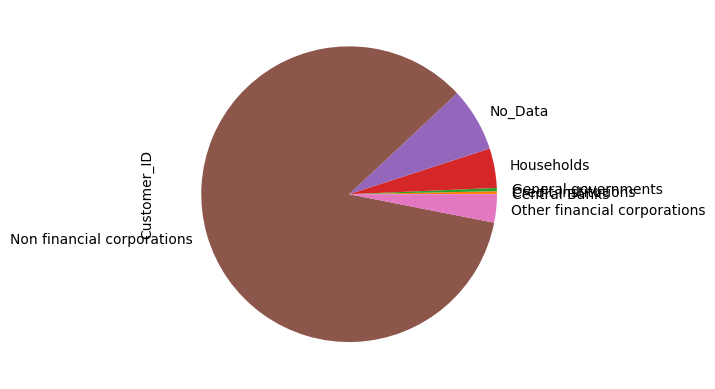

In [76]:
df_dict['Customer'].groupby('Sector_Name')['Customer_ID'].count().plot(kind='pie')

In [77]:
#creating asset and off balance filter 

df_dict['GL'].head()

,GL_Account_ID,GL_Account,GL_Name,Group_GL_Account_ID,GL_Account_Type,GL_Account_Name
0,1000000008584,100,Loan guarantees,1000000002721,0,Off-balance-sheet items
1,1000000013690,100427,EIR Correction for loan fees paid ni arrears,1000000002728,1,Assets
2,1000000008710,100400,"Loans non-demand, other",1000000002728,1,Assets
3,1000000015433,104417,"Unpaid interest amount on loans, non demand, SLO",1000000103203,1,Assets
4,1000000008590,110,Other guarantees,1000000002721,0,Off-balance-sheet items


In [79]:
df_dict['Financial'].head()

,Agreement_ID,GL_Account_ID,Source,Customer_ID,Amount
0,1000162418540,1000000008710,229|ADJ,1000007793706,0.00
1,1000376865946,1000000013691,229,1000009653088,-5198.52
2,1000205191664,1000000008710,229|ADJ,1000044609208,0.00
3,1000329416423,1000000008710,229|ADJ,1000009657652,0.00
4,1000239743539,1000000008710,229|ADJ,1000007699415,0.00


In [93]:
# constructing DF with Customer_ID, Amount, Sector_Name, GL_Account_ID, GL_Account_Name

In [105]:
df_Q1 = df_dict['Financial']
df_Q1 = pd.merge(df_Q1, df_dict['Customer'][['Sector_Name','Customer_ID']], how = 'left', on = 'Customer_ID')
df_Q1 = pd.merge(df_Q1, df_dict['GL'][['GL_Account_ID','GL_Account_Name']], how = 'left', on = 'GL_Account_ID')
df_Q1.head()

,Agreement_ID,GL_Account_ID,Source,Customer_ID,Amount,Sector_Name,GL_Account_Name
0,1000162418540,1000000008710,229|ADJ,1000007793706,0.00,Non financial corporations,Assets
1,1000376865946,1000000013691,229,1000009653088,-5198.52,Non financial corporations,Assets
2,1000205191664,1000000008710,229|ADJ,1000044609208,0.00,Non financial corporations,Assets
3,1000329416423,1000000008710,229|ADJ,1000009657652,0.00,Non financial corporations,Assets
4,1000239743539,1000000008710,229|ADJ,1000007699415,0.00,No_Data,Assets


### Answer Q2

In [132]:
df_answ_Q1 = df_Q1.groupby(['Sector_Name','GL_Account_Name'])[['Sector_Name', 'GL_Account_Name','Amount']].sum('Amount')
df_answ_Q1

Amount
Sector_Name                  GL_Account_Name                      
Central Banks                Assets                  -4.577565e+05
Credit institutions          Assets                  -4.278055e+09
                             Off-balance-sheet items -6.201119e+10
General governments          Assets                  -1.003070e+09
                             Off-balance-sheet items -8.674180e+08
Households                   Assets                  -4.138537e+08
                             Off-balance-sheet items -1.151603e+07
No_Data                      Assets                  -3.480891e+09
                             Off-balance-sheet items -2.874168e+09
Non financial corporations   Assets                  -4.115274e+10
                             Off-balance-sheet items -2.233238e+10
Other financial corporations Assets                  -3.107687e+09
                             Off-balance-sheet items -1.427112e+09

In [1071]:
GL_total = df_Q1.groupby(['GL_Account_Name'])[['Amount']].sum()

In [661]:
grouped.index

Index(['Central Banks', 'Credit institutions', 'General governments',
       'Households', 'No_Data', 'Non financial corporations',
       'Other financial corporations'],
      dtype='object', name='Sector_Name')

In [662]:
# Group the data by 'Sector_Name' and sum the 'Amount' column
grouped_2 = df_Q1[df_Q1['GL_Account_Name'] == 'Off-balance-sheet items'].groupby('Sector_Name')[['Amount']].sum().abs()
total = grouped_2['Amount'].sum()
grouped_2['percentage'] = (grouped_2['Amount'] / total) * 100

# Create the bar chart
fig = px.bar(grouped_2, x=grouped_2.index, y='Amount', color_continuous_scale='Blues', width=2000, height=800) 


fig.update_traces(text = grouped_2['percentage'].apply(lambda x: '{:.3f}%'.format(x)), hoverinfo='text',textposition='outside', marker=dict(color="#87CEEB")),


# Set the title and remove the x-axis label
fig.update_layout(title_text="'Off-balance-sheet items' by Sector", xaxis_title="", font=dict(size=16),  paper_bgcolor='white', plot_bgcolor = 'white') 

# Show the plot
fig.show()

In [1111]:

import plotly.graph_objects as go
grouped = df_Q1[df_Q1['GL_Account_Name'] == 'Assets'].groupby('Sector_Name')[['Amount']].sum().abs()
total = grouped['Amount'].sum()
grouped['percentage'] = (grouped['Amount'] / total) * 100

grouped_2 = df_Q1[df_Q1['GL_Account_Name'] == 'Off-balance-sheet items'].groupby('Sector_Name')[['Amount']].sum().abs()
total_2 = grouped_2['Amount'].sum()
grouped_2['percentage'] = (grouped_2['Amount'] / total_2) * 100

fig_Q = go.Figure()



fig_Q.add_trace(go.Bar(

    x=grouped.index, 
    y=grouped['Amount'],
    marker_color = '#0000A0',
    text=grouped['percentage'].apply(lambda x: '{:.3f}%'.format(x)),
    name = 'Assets' 
    #color_continuous_scale='Blues', 
    ))


fig_Q.add_trace(go.Bar(

    x=grouped_2.index, 
    y=grouped_2['Amount'],
    marker_color = '#3399FF',
    text=grouped_2['percentage'].apply(lambda x: '{:.3f}%'.format(x)),
    name = 'Off-balance-sheet items' 
    #color_continuous_scale='Blues', 
    ))

fig_Q.update_traces( textposition='outside'),

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig_Q.update_layout(title_text="Distribution by Assets and Off-balance-sheet items", barmode='group',  width=2000, height=1000, font=dict(size=20), xaxis_tickangle=-45, paper_bgcolor='white', plot_bgcolor = 'white')
fig_Q.show()

In [685]:
import plotly.offline as pl_off
pl_off.plot(fig_Q, filename="graph_Q2.html")

'graph_Q2.html'

# Q3 Explain the total amount for each sector category before and after adjustment. Hint: Adjustments have “ADJ” text in Source attribute

In [115]:
df_dict['Financial'].sort_values('Customer_ID').tail(50)

,Agreement_ID,GL_Account_ID,Source,Customer_ID,Amount
26980,1000393760897,1000000008598,229,1000049275820,-4.402232e+04
22439,1000392226092,1000000008710,229,1000049275821,-1.738882e+06
33390,1000392226092,1000000013691,229,1000049275821,-5.642670e+03
13612,1000391786368,1000000013573,229,1000049275821,5.335300e+02
6879,1000387918970,1000000008710,229,1000049284762,-3.946495e+05
17037,1000387918970,1000000013691,229,1000049284762,-2.072980e+03
2819,1000387918969,1000000008710,229,1000049284762,-2.332227e+07
9387,1000387918969,1000000013691,229,1000049284762,-1.345039e+05
14240,1000392581353,1000000013691,229,1000049308783,-5.590000e+04
21181,1000392581339,1000000013573,229,1000049308783,2.062900e+05


In [630]:
#without adjusted
df_answ_Q2_No_adj = df_Q1.query('Source != "229|ADJ"').groupby(['Sector_Name','GL_Account_Name'])[['Sector_Name', 'GL_Account_Name','Amount']].sum('Amount')
df_answ_Q2_No_adj

Amount
Sector_Name                  GL_Account_Name                      
Central Banks                Assets                  -4.577565e+05
Credit institutions          Assets                  -4.278055e+09
                             Off-balance-sheet items -6.201119e+10
General governments          Assets                  -1.003070e+09
                             Off-balance-sheet items -8.674180e+08
Households                   Assets                  -4.138536e+08
                             Off-balance-sheet items -1.151603e+07
No_Data                      Assets                  -3.480845e+09
                             Off-balance-sheet items -2.874168e+09
Non financial corporations   Assets                  -4.115239e+10
                             Off-balance-sheet items -2.233238e+10
Other financial corporations Assets                  -3.107638e+09
                             Off-balance-sheet items -1.427112e+09

In [650]:
df_answ_Q2_Adj = df_Q1.query('Source == "229|ADJ"').groupby(['Sector_Name','GL_Account_Name'])[['Sector_Name', 'GL_Account_Name','Amount']].sum('Amount').abs()
df_answ_Q2_Adj= df_answ_Q2_Adj.reset_index()

In [635]:
grouped_Q2 = df_Q1[df_Q1['GL_Account_Name'] == 'Assets'].groupby(['Sector_Name','Source'])[['Amount']].sum().abs()
grouped_Q2 = grouped_Q2.reset_index()

In [1113]:
grouped_Q2a = df_Q1[df_Q1['GL_Account_Name'] == 'Off-balance-sheet items'].groupby(['Sector_Name','Source'])[['Amount']].sum().abs()
grouped_Q2a = grouped_Q2a.reset_index()

In [1114]:
grouped_Q2a

,Sector_Name,Source,Amount
0,Credit institutions,229,6.201119e+10
1,General governments,229,8.674180e+08
2,Households,229,1.151603e+07
3,No_Data,229,2.874168e+09
4,Non financial corporations,229,2.233238e+10
5,Other financial corporations,229,1.427112e+09


In [647]:
grouped_Q2

,Sector_Name,Source,Amount,percentage
0,Central Banks,229,4.577565e+05,8.532317e-04
1,Central Banks,229|ADJ,0.000000e+00,0.000000e+00
2,Credit institutions,229,4.278055e+09,7.974047e+00
3,Credit institutions,229|ADJ,0.000000e+00,0.000000e+00
4,General governments,229,1.003070e+09,1.869665e+00
5,General governments,229|ADJ,0.000000e+00,0.000000e+00
6,Households,229,4.138536e+08,7.713992e-01
7,Households,229|ADJ,8.254000e+01,1.538498e-07
8,No_Data,229,3.482445e+09,6.491077e+00
9,No_Data,229|ADJ,4.559572e+04,8.498779e-05


In [1112]:
# Group the data by 'Sector_Name' and sum the 'Amount' column
#df_answ_Q2_Adj = df_Q1[df_Q1['GL_Account_Name'] == 'Off-balance-sheet items'].groupby('Sector_Name')[['Amount']].sum().abs()
total = grouped_Q2['Amount'].sum()
df_answ_Q2_Adj['Percentage of Total'] = (df_answ_Q2_Adj['Amount'] / total) * 100

# Create the bar chart
fig_Q3 = px.bar(df_answ_Q2_Adj, x='Sector_Name', y='Amount', color_continuous_scale='Blues', width=2000, height=1000) 


fig_Q3.update_traces(text = df_answ_Q2_Adj['Percentage of Total'].apply(lambda x: '{:.6f}%'.format(x)), hoverinfo='text',textposition='outside', marker=dict(color="#99CCFF") )#,


# Set the title and remove the x-axis label
fig_Q3.update_layout(title_text="Adjustments per Sector", xaxis_title="", font=dict(size=20), xaxis_tickangle=-45, paper_bgcolor='white', plot_bgcolor = 'white') 

# Show the plot
fig_Q3.show()

In [136]:
#currency adjustment due time

# Q4 Explain the amounts aggregated on countries. Show which country has maximum assets per NACE code and sector category.

In [138]:
df_dict.keys()

dict_keys(['Customer', 'Instrument', 'Financial', 'GL', 'Group_GL'])

In [154]:
df_dict["Financial"].columns.to_list()

['Agreement_ID', 'GL_Account_ID', 'Source', 'Customer_ID', 'Amount']

In [ ]:
# 'Customer_ID', 'Agreement_ID','Amount', 'Sector_Name', 'Country_Customer', NACE_Name_L1

In [772]:
df_Q4 = df_dict['Financial']
df_Q4 = pd.merge(df_Q4, df_dict['Customer'][['Sector_Name','Customer_ID','Country_Customer', 'NACE_Name_L1']], how = 'left', on = 'Customer_ID')
df_Q4 = pd.merge(df_Q4, df_dict['GL'][['GL_Account_ID','GL_Account_Name']], how = 'left', on = 'GL_Account_ID')
df_Q4.head()

,Agreement_ID,GL_Account_ID,Source,Customer_ID,Amount,Sector_Name,Country_Customer,NACE_Name_L1,GL_Account_Name
0,1000162418540,1000000008710,229|ADJ,1000007793706,0.00,Non financial corporations,NO,REAL ESTATE ACTIVITIES,Assets
1,1000376865946,1000000013691,229,1000009653088,-5198.52,Non financial corporations,DK,"AGRICULTURE, FORESTRY AND FISHING",Assets
2,1000205191664,1000000008710,229|ADJ,1000044609208,0.00,Non financial corporations,NO,FINANCIAL AND INSURANCE ACTIVITIES,Assets
3,1000329416423,1000000008710,229|ADJ,1000009657652,0.00,Non financial corporations,DK,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES",Assets
4,1000239743539,1000000008710,229|ADJ,1000007699415,0.00,No_Data,NaN,WHOLESALE AND RETAIL TRADE,Assets


In [1080]:
#fill nan with No_Data
df_Q4 = df_Q4.fillna('No_Data')

In [1081]:
list_highest_spender = df_Q4.query('GL_Account_Name == "Assets"').groupby('Country_Customer')['Amount'].sum().sort_values().head(5).index.to_list()
list_highest_spender

['NO', 'SE', 'FI', 'DK', 'PL']

In [1082]:
df_answ_Q4b = df_Q4.groupby(['NACE_Name_L1','Country_Customer'])[['NACE_Name_L1', 'Country_Customer','Amount','GL_Account_Name']].sum('Amount').sort_values('Amount')

df_answ_Q4b

,,Amount
NACE_Name_L1,Country_Customer,
No_Data,FI,-6.003419e+10
REAL ESTATE ACTIVITIES,NO,-7.437014e+09
No_Data,PL,-5.619538e+09
WHOLESALE AND RETAIL TRADE,No_Data,-4.638005e+09
REAL ESTATE ACTIVITIES,SE,-4.156637e+09
...,...,...
TRANSPORTATION AND STORAGE,AG,0.000000e+00
MANUFACTURING,BG,0.000000e+00
FINANCIAL AND INSURANCE ACTIVITIES,VG,4.418290e+03


In [1083]:
df_answ_Q4b_assets = df_Q4.query('GL_Account_Name == "Assets"').groupby(['NACE_Name_L1','Country_Customer'])['Amount'].sum()
df_answ_Q4b_assets = df_answ_Q4b_assets.reset_index().sort_values('Amount').reset_index()
df_answ_Q4b_assets['Amount'] = df_answ_Q4b_assets['Amount'].abs()
df_answ_Q4b_assets['Country']= ['Other' if country not in list_highest_spender else country for  country in df_answ_Q4b_assets['Country_Customer']]
df_answ_Q4b_assets

,index,NACE_Name_L1,Country_Customer,Amount,Country
0,218,REAL ESTATE ACTIVITIES,NO,7.055172e+09,NO
1,191,No_Data,PL,3.875941e+09,PL
2,219,REAL ESTATE ACTIVITIES,SE,3.232902e+09,SE
3,244,TRANSPORTATION AND STORAGE,NO,2.781203e+09,NO
4,250,WHOLESALE AND RETAIL TRADE,No_Data,2.669686e+09,Other
...,...,...,...,...,...
246,85,FINANCIAL AND INSURANCE ACTIVITIES,FO,0.000000e+00,Other
247,98,FINANCIAL AND INSURANCE ACTIVITIES,VG,4.418290e+03,Other
248,68,"ELECTRICITY, GAS, STEAM AND AIR CONDITIONING S...",CZ,4.971560e+03,Other
249,168,MINING AND QUARRYING,UZ,7.527090e+03,Other


In [1084]:
df_answ_Q4b_off_B = df_Q4.query('GL_Account_Name == "Off-balance-sheet items"').groupby(['NACE_Name_L1','Country_Customer'])[['NACE_Name_L1', 'Country_Customer','Amount','GL_Account_Name']].sum('Amount').sort_values('Amount')
df_answ_Q4b_off_B = df_answ_Q4b_off_B.reset_index()
df_answ_Q4b_off_B['Amount'] = df_answ_Q4b_off_B['Amount'].abs()
df_answ_Q4b_off_B['Country']= ['Other' if country not in list_highest_spender else country for  country in df_answ_Q4b_off_B['Country_Customer']]


In [1085]:
df_answ_Q4b_off_B

,NACE_Name_L1,Country_Customer,Amount,Country
0,No_Data,FI,6.000711e+10,FI
1,MANUFACTURING,SE,2.139976e+09,SE
2,WHOLESALE AND RETAIL TRADE,No_Data,1.968319e+09,Other
3,MANUFACTURING,FI,1.867186e+09,FI
4,No_Data,PL,1.743597e+09,PL
...,...,...,...,...
131,TRANSPORTATION AND STORAGE,MX,1.000000e-02,Other
132,"AGRICULTURE, FORESTRY AND FISHING",CN,1.000000e-02,Other
133,FINANCIAL AND INSURANCE ACTIVITIES,BE,1.000000e-02,Other
134,"ELECTRICITY, GAS, STEAM AND AIR CONDITIONING S...",CL,1.000000e-02,Other


In [1086]:
# Define the custom color list
colors = ['#C9C7C7', '#FBD9CA', '#99CCFF', '#7DB1E2', '#3399FF', '#0000A0']

# Create the bar chart
fig_Q4b1 = px.histogram(df_answ_Q4b_assets, x='NACE_Name_L1', y='Amount', color='Country', width=2000, height=1000)

# Set the color of the bars using the custom color list
for i, color in enumerate(reversed(colors)):
    fig_Q4b1.data[i].marker.color = color

fig_Q4b1.update_traces( hoverinfo='text', textposition='outside', )

# Set the title and remove the x-axis label
fig_Q4b1.update_layout(title_text="Distribution of assets by NACE L1", xaxis_title="", font=dict(size=18), xaxis_tickangle=-45, paper_bgcolor='white', plot_bgcolor = 'white') 

# Show the plot
fig_Q4b1.show()

In [1087]:
# Define the custom color list
colors = ['#FBD9CA', '#0000A0', '#99CCFF', '#7DB1E2', '#3399FF' ]

# Create the bar chart
fig_Q4b2 = px.histogram(df_answ_Q4b_off_B, x='NACE_Name_L1', y='Amount', color='Country', width=2000, height=1000)

# Set the color of the bars using the custom color list
for i, color in enumerate(reversed(colors)):
    fig_Q4b2.data[i].marker.color = color

fig_Q4b2.update_traces( hoverinfo='text', textposition='outside', )

# Set the title and remove the x-axis label
fig_Q4b2.update_layout(title_text="Distribution of 'Off balance items' amount by NACE L1", xaxis_title="", font=dict(size=18), xaxis_tickangle=-45, paper_bgcolor='white', plot_bgcolor = 'white') 

# Show the plot
fig_Q4b2.show()

In [ ]:
df_answ_Q4b_total = df_Q4.query('GL_Account_Name == "Off-balance-sheet items"').groupby(['NACE_Name_L1','Country_Customer'])[['NACE_Name_L1', 'Country_Customer','Amount','GL_Account_Name']].sum('Amount').sort_values('Amount')
df_answ_Q4b_off_B = df_answ_Q4b_off_B.reset_index()

In [1079]:
import plotly.graph_objects as go
grouped = df_Q4[df_Q4['GL_Account_Name'] == 'Assets'].groupby('NACE_Name_L1')[['Amount']].sum().abs().sort_values('Amount', ascending=False)
total = grouped['Amount'].sum()
grouped['percentage'] = (grouped['Amount'] / total) * 100

grouped_2 = df_Q4[df_Q4['GL_Account_Name'] == 'Off-balance-sheet items'].groupby('NACE_Name_L1')[['Amount']].sum().abs().sort_values('Amount', ascending=False)
total_2 = grouped_2['Amount'].sum()
grouped_2['percentage'] = (grouped_2['Amount'] / total_2) * 100

fig_Q4b_tot = go.Figure()



fig_Q4b_tot.add_trace(go.Bar(

    x=grouped.index, 
    y=grouped['Amount'],
    marker_color = '#0000A0',
    text=grouped['percentage'].apply(lambda x: '{:.3f}%'.format(x)),
    name = 'Assets' 
    #color_continuous_scale='Blues', 
    ))


fig_Q4b_tot.add_trace(go.Bar(

    x=grouped_2.index, 
    y=grouped_2['Amount'],
    marker_color = '#3399FF',
    text=grouped_2['percentage'].apply(lambda x: '{:.3f}%'.format(x)),
    name = 'Off-balance-sheet items' 
    #color_continuous_scale='Blues', 
    ))

fig_Q4b_tot.update_traces( textposition='outside'),

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig_Q4b_tot.update_layout(title_text="Distribution of Assets and Off-balance-sheet items by NACE", barmode='group',  width=2000, height=1000, font=dict(size=18), xaxis_tickangle=-45, paper_bgcolor='white', plot_bgcolor = 'white')
fig_Q4b_tot.show()

In [1088]:
grouped['Amount'].sum(), grouped_2['Amount'].sum()

(53436753675.19999, 89523777933.81998)

In [1075]:
GL_total, 

(                               Amount
 GL_Account_Name                      
 Assets                  -5.343675e+10
 Off-balance-sheet items -8.952378e+10,)

In [977]:
import plotly
plotly.offline.plot(fig_Q4b_tot, filename="bar_chart_Q4.html")

'bar_chart_Q4.html'

In [1089]:
df_answ_Q4 = df_Q4.query('GL_Account_Name == "Assets"').groupby(['Sector_Name','Country_Customer'])[['Sector_Name', 'Country_Customer','Amount']].sum('Amount').sort_values('Amount')
df_answ_Q4 = df_answ_Q4.reset_index()
df_answ_Q4['Amount'] = df_answ_Q4['Amount'].abs()
df_answ_Q4['Country']= ['Other' if country not in list_highest_spender else country for  country in df_answ_Q4['Country_Customer']]
df_answ_Q4

,Sector_Name,Country_Customer,Amount,Country
0,Non financial corporations,NO,1.497057e+10,NO
1,Non financial corporations,SE,7.818048e+09,SE
2,Non financial corporations,FI,5.097922e+09,FI
3,Non financial corporations,DK,4.030825e+09,DK
4,Credit institutions,PL,3.869194e+09,PL
...,...,...,...,...
121,Non financial corporations,GL,0.000000e+00,Other
122,Non financial corporations,VG,4.418290e+03,Other
123,Non financial corporations,UZ,7.527090e+03,Other
124,General governments,SE,9.135725e+04,SE


In [1099]:
# Define the custom color list
colors = ['#C9C7C7', '#FBD9CA', '#99CCFF', '#7DB1E2', '#3399FF', '#0000A0']

# Create the bar chart
fig_Q4a = px.histogram(df_answ_Q4, x='Sector_Name', y='Amount', color='Country', width=2000, height=800)

# Set the color of the bars using the custom color list
for i, color in enumerate(reversed(colors)):
    fig_Q4a.data[i].marker.color = color

fig_Q4a.update_traces( hoverinfo='text', textposition='outside')

# Set the title and remove the x-axis label
fig_Q4a.update_layout(title_text="Distribution of total amounts assets by Sector", xaxis_title="", font=dict(size=20), xaxis_tickangle=-45, paper_bgcolor='white', plot_bgcolor = 'white') 

# Show the plot
fig_Q4a.show()

In [1091]:
df_answ_Q4_b = df_Q4.query('GL_Account_Name == "Off-balance-sheet items"').groupby(['Sector_Name','Country_Customer'])[['Sector_Name', 'Country_Customer','Amount']].sum('Amount').sort_values('Amount')
df_answ_Q4_b = df_answ_Q4_b.reset_index()
df_answ_Q4_b['Amount'] = df_answ_Q4_b['Amount'].abs()
df_answ_Q4_b['Country']= ['Other' if country not in list_highest_spender else country for  country in df_answ_Q4_b['Country_Customer']]
df_answ_Q4_b

,Sector_Name,Country_Customer,Amount,Country
0,Credit institutions,FI,6.008809e+10,FI
1,Non financial corporations,SE,6.664473e+09,SE
2,Non financial corporations,NO,5.602660e+09,NO
3,Non financial corporations,FI,3.649987e+09,FI
4,Non financial corporations,DK,3.466026e+09,DK
...,...,...,...,...
58,Non financial corporations,AE,4.000000e-02,Other
59,Credit institutions,HN,3.000000e-02,Other
60,Non financial corporations,KY,2.000000e-02,Other
61,Non financial corporations,LV,1.000000e-02,Other


In [1100]:
# Define the custom color list
colors = ['#C9C7C7', '#FBD9CA', '#99CCFF', '#0000A0', '#3399FF', '#7DB1E2' ]

# Create the bar chart
fig_Q4a1 = px.histogram(df_answ_Q4_b, x='Sector_Name', y='Amount', color='Country', width=2000, height=800)

# Set the color of the bars using the custom color list
for i, color in enumerate(reversed(colors)):
    fig_Q4a1.data[i].marker.color = color

fig_Q4a1.update_traces( hoverinfo='text', textposition='outside')

# Set the title and remove the x-axis label
fig_Q4a1.update_layout(title_text="Distribution of total amounts 'Off Balance Sheet Items' by Sector", xaxis_title="", font=dict(size=20), xaxis_tickangle=-45, paper_bgcolor='white', plot_bgcolor = 'white') 

# Show the plot
fig_Q4a1.show()

In [1093]:
# Pivot tabel with both Assest and Off Balance

table = pd.pivot_table(df_Q4, values='Amount', index=['Country_Customer'],

                    columns=['NACE_Name_L1','GL_Account_Name'], aggfunc=np.sum).fillna(0)  #

table.head(5)

NACE_Name_L1     ACCOMMODATION AND FOOD SERVICE ACTIVITIES  \
GL_Account_Name                                     Assets   
Country_Customer                                             
AE                                                     0.0   
AG                                                     0.0   
AO                                                     0.0   
AR                                                     0.0   
AT                                                     0.0   

NACE_Name_L1                              \
GL_Account_Name  Off-balance-sheet items   
Country_Customer                           
AE                                   0.0   
AG                                   0.0   
AO                                   0.0   
AR                                   0.0   
AT                                   0.0   

NACE_Name_L1     ACTIVITIES OF EXTRATERRITORIAL ORGANISATIONS AND BODIES  \
GL_Account_Name                                                   Assets   
Country_Customer                                                           
AE                                                              0.0        
AG                                                              0.0        
AO                                                              0.0        
AR                                                              0.0        
AT                                                              0.0        

NACE_Name_L1                              \
GL_Account_Name  Off-balance-sheet items   
Country_Customer                           
AE                                   0.0   
AG                                   0.0   
AO                                   0.0   
AR                                   0.0   
AT                                   0.0   

NACE_Name_L1     ACTIVITIES OF HOUSEHOLDS AS EMPLOYERS  \
GL_Account_Name                                 Assets   
Country_Customer                                         
AE                                                 0.0   
AG                                                 0.0   
AO                                                 0.0   
AR                                                 0.0   
AT                                                 0.0   

NACE_Name_L1     ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES  \
GL_Account_Name                                         Assets   
Country_Customer                                                 
AE                                                         0.0   
AG                                                         0.0   
AO                                                         0.0   
AR                                                         0.0   
AT                                                         0.0   

NACE_Name_L1                             AGRICULTURE, FORESTRY AND FISHING  \
GL_Account_Name  Off-balance-sheet items                            Assets   
Country_Customer                                                             
AE                                   0.0                               0.0   
AG                                   0.0                               0.0   
AO                                   0.0                               0.0   
AR                                   0.0                               0.0   
AT                                   0.0                               0.0   

NACE_Name_L1                             ARTS, ENTERTAINMENT AND RECREATION  \
GL_Account_Name  Off-balance-sheet items                             Assets   
Country_Customer                                                              
AE                                   0.0                                0.0   
AG                                   0.0                                0.0   
AO                                   0.0                                0.0   
AR                                   0.0                                0.0   
AT              

In [1094]:
# Pivot tabel with only Assest

table_assets = pd.pivot_table(df_Q4[df_Q4['GL_Account_Name'] == 'Assets'], values='Amount', index=['Country_Customer'],

                    columns=['NACE_Name_L1'], aggfunc=np.sum).fillna(0)  #

table_assets.head(5)

NACE_Name_L1,ACCOMMODATION AND FOOD SERVICE ACTIVITIES,ACTIVITIES OF EXTRATERRITORIAL ORGANISATIONS AND BODIES,ACTIVITIES OF HOUSEHOLDS AS EMPLOYERS,ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES,"AGRICULTURE, FORESTRY AND FISHING","ARTS, ENTERTAINMENT AND RECREATION",CONSTRUCTION,EDUCATION,"ELECTRICITY, GAS, STEAM AND AIR CONDITIONING SUPPLY",FINANCIAL AND INSURANCE ACTIVITIES,HUMAN HEALTH AND SOCIAL WORK ACTIVITIES,INFORMATION AND COMMUNICATION,MANUFACTURING,MINING AND QUARRYING,No_Data,OTHER SERVICE ACTIVITIES,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES",PUBLIC ADMINISTRATION AND DEFENCE,REAL ESTATE ACTIVITIES,TRANSPORTATION AND STORAGE,WATER SUPPLY,WHOLESALE AND RETAIL TRADE
Country_Customer,,,,,,,,,,,,,,,,,,,,,,
AE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,-57751739.42,0.0,0.0
AG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0
AO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3913550.46,0.0,0.00,0.0,0.0,0.00,0.0,0.0
AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0
AT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,-6680.55,0.0,0.0,0.00,0.0,0.0


In [1095]:


idx = table.values.argmin()
row, col = np.unravel_index(idx, table.shape)

maximum_value = table.iloc[row, col]
maximum_row_name = table.index[row]
maximum_col_name = table.columns[col]

print("Maximum value:", maximum_value)
print("Row name:", maximum_row_name)
print("Column name:", maximum_col_name)

Maximum value: -60007105838.35
Row name: FI
Column name: ('No_Data', 'Off-balance-sheet items')


### Q4 Answer  " Most assets for NACE name "

In [1096]:
def mostAmount(df):
    idx = df.values.argmin()
    row, col = np.unravel_index(idx, df.shape)

    maximum_value = df.iloc[row, col]
    maximum_row_name = df.index[row]
    maximum_col_name = df.columns[col]

    print("Maximum value:", maximum_value)
    print("Row name:", maximum_row_name)
    print("Column name:", maximum_col_name)

In [457]:
mostAmount(table_assets)

Maximum value: -7055171578.3
Row name: NO
Column name: REAL ESTATE ACTIVITIES


### Q4 extra: Overview for " Most assets per country for each NACE category"

In [1097]:
for i in df_Q4['NACE_Name_L1'].unique():
    print(i)
    print(table[i].sort_values('Assets').head(3))
    print('########################################')
    #sns.barplot(data=table[i], x=table[i].index, y="Assets")

REAL ESTATE ACTIVITIES
GL_Account_Name         Assets  Off-balance-sheet items
Country_Customer                                       
NO               -7.055172e+09            -3.818426e+08
SE               -3.232902e+09            -9.237350e+08
FI               -1.563692e+09            -2.468117e+08
########################################
AGRICULTURE, FORESTRY AND FISHING
GL_Account_Name         Assets  Off-balance-sheet items
Country_Customer                                       
NO               -6.262915e+08            -1.736752e+08
DK               -6.202781e+08            -1.066058e+06
SE               -1.898854e+08            -1.538160e+08
########################################
FINANCIAL AND INSURANCE ACTIVITIES
GL_Account_Name         Assets  Off-balance-sheet items
Country_Customer                                       
FI               -1.614259e+09            -5.121087e+08
SE               -1.487116e+09            -1.266356e+09
DK               -1.194522e+09            

### Q4 answer: Country with the most assets per Sector Name

In [1098]:
# Pivot tabel with for sum of Assest per Sector_Name

table_assets_sectorName = pd.pivot_table(df_Q4[df_Q4['GL_Account_Name'] == 'Assets'], values='Amount', index=['Country_Customer'],

                    columns=['Sector_Name'], aggfunc=np.sum).fillna(0) 
                    
mostAmount(table_assets_sectorName)


Maximum value: -14970574545.25
Row name: NO
Column name: Non financial corporations


In [150]:
#Nan analysis

df_dict["Customer"].isna().sum(), df_dict["Instrument"].isna().sum(), df_dict["Financial"].isna().sum()

(Customer_ID                     0
 Local_Customer_ID               0
 Customer_Name                1396
 NACE_Code_L1                  219
 NACE_Name_L1                  239
 NACE_Code                     674
 Bankrupcy_Flag                455
 Rating_Score                 1309
 Country_Customer              455
 Customer_Responsible_Unit     470
 Sector_Code                   471
 Sector_Name                     0
 dtype: int64,
 Agreement_ID                    0
 Account_Number                  0
 Account_Number_Old              0
 Performing_Non_Performing       0
 Effective_Date                  1
 Closing_Date                  474
 Maturity_Date                 282
 Registration_Date            3588
 Country_Instrument              0
 Basel_FT_ID                   434
 Last_Repricing_Date          8627
 Agreement_Purpose             277
 Amortization_Method          6231
 dtype: int64,
 Agreement_ID     0
 GL_Account_ID    0
 Source           0
 Customer_ID      0
 Amount        

# Q5 What is the total assets for missing Customer Responsible Unit? Can you find any trend from customer or instrument perspective?

In [161]:
df_dict["Customer"]['Customer_Responsible_Unit'] = df_dict["Customer"]['Customer_Responsible_Unit'].astype('object')

In [163]:
df_dict["Customer"]['Customer_Responsible_Unit'] = df_dict["Customer"]['Customer_Responsible_Unit'].fillna('No_Data')

In [170]:
df_dict['Customer'].query('Customer_Responsible_Unit == "No_Data"').head(50)

,Customer_ID,Local_Customer_ID,Customer_Name,NACE_Code_L1,NACE_Name_L1,NACE_Code,Bankrupcy_Flag,Rating_Score,Country_Customer,Customer_Responsible_Unit,Sector_Code,Sector_Name
0,1000009735298,4339256379,YYT YQRWMZRTS ZT,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
1,1000009736257,4343649237,FRXSTZDS KZNSZS TYNYLQX T V,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
11,1000009772778,4373700911,FRYDYRXKSSQND KWMMQNY,O,PUBLIC ADMINISTRATION AND DEFENCE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
23,1000000254501,5560485962,WJZY SVYRXGY ZT,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
52,1000045021665,9557523975,YNVXRWMZJ GRWQM ZS,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
75,1000007785665,989181734,JWTWTXJW HWLDXNG ZS,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
85,1000044677250,4504292091,HYRNXNG VZND Z/S,E,WATER SUPPLY,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
89,1000009734632,4335409529,TRWSTY JWMYNHZGYN Z/S,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
108,1000007690908,910947052,LØVYNSKXWLD-VÆKYRØ Z/S,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
115,1000007711228,953170124,VXGRZ SYRVXJYNTYR Z/S,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data


In [167]:
df_dict['Customer'].query('Customer_Responsible_Unit == "No_Data"').groupby('NACE_Name_L1')['NACE_Name_L1'].count()

NACE_Name_L1
ACTIVITIES OF HOUSEHOLDS AS EMPLOYERS                  3
AGRICULTURE, FORESTRY AND FISHING                      1
FINANCIAL AND INSURANCE ACTIVITIES                     2
INFORMATION AND COMMUNICATION                          1
PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES      2
PUBLIC ADMINISTRATION AND DEFENCE                     24
REAL ESTATE ACTIVITIES                                 3
WATER SUPPLY                                          41
WHOLESALE AND RETAIL TRADE                           387
Name: NACE_Name_L1, dtype: int64

In [ ]:
# WHOLESALE AND RETAIL TRADE   missing the Customer Responsible unit

In [174]:
print(df_dict["Instrument"].columns.to_list())

['Agreement_ID', 'Account_Number', 'Account_Number_Old', 'Performing_Non_Performing', 'Effective_Date', 'Closing_Date', 'Maturity_Date', 'Registration_Date', 'Country_Instrument', 'Basel_FT_ID', 'Last_Repricing_Date', 'Agreement_Purpose', 'Amortization_Method']


In [175]:
df_dict["Financial"]

,Agreement_ID,GL_Account_ID,Source,Customer_ID,Amount
0,1000162418540,1000000008710,229|ADJ,1000007793706,0.00
1,1000376865946,1000000013691,229,1000009653088,-5198.52
2,1000205191664,1000000008710,229|ADJ,1000044609208,0.00
3,1000329416423,1000000008710,229|ADJ,1000009657652,0.00
4,1000239743539,1000000008710,229|ADJ,1000007699415,0.00
...,...,...,...,...,...
39351,1000395429933,1000000013691,229,1000020757355,-260.27
39352,1000329416652,1000000008710,229|ADJ,1000009664986,0.00
39353,1000233274452,1000000009076,229|ADJ,1000009074607,-55.03
39354,1000169428888,1000000008710,229|ADJ,1000009135343,0.00


In [1010]:
df_Q5a = df_dict['Financial'][['Agreement_ID', 'Customer_ID', 'Amount','GL_Account_ID']]
df_Q5a = pd.merge(df_Q5a, df_dict['Customer'][['Customer_Responsible_Unit','Customer_ID','Country_Customer', 'NACE_Name_L1']], how = 'left', on = 'Customer_ID')

df_Q5.query('Customer_Responsible_Unit == "No_Data"').groupby('Customer_ID')

In [1023]:
cust_id_amount = pd.DataFrame(df_Q5.query('Customer_Responsible_Unit == "No_Data"').groupby(['Customer_ID'])['Amount'].sum()).reset_index()

In [1025]:
df_Q5b = pd.merge(cust_id_amount, df_dict['Customer'], how = 'left', on = 'Customer_ID')
df_Q5b

,Customer_ID,Amount,Local_Customer_ID,Customer_Name,NACE_Code_L1,NACE_Name_L1,NACE_Code,Bankrupcy_Flag,Rating_Score,Country_Customer,Customer_Responsible_Unit,Sector_Code,Sector_Name
0,1000000122622,-3.383548e+07,5562584804,VXTYJ SWFTWZRY GRWQM ZT (MQTL),J,INFORMATION AND COMMUNICATION,582900.0,0.0,PC4+,SE,No_Data,NaN,No_Data
1,1000000166661,-3.784977e+05,195812193554,NaN,NaN,NaN,NaN,0.0,PPC-,SE,No_Data,NaN,No_Data
2,1000000250740,-1.743127e+08,2120001355,GÖTYTWRGS KWMMQN,O,PUBLIC ADMINISTRATION AND DEFENCE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
3,1000000250759,-2.618071e+07,2120001561,TWRÅS STZD,O,PUBLIC ADMINISTRATION AND DEFENCE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
4,1000000252779,-1.255548e+08,5560082561,ZT STYNZ MYTZLL FXNZNS,E,WATER SUPPLY,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1000048774493,-4.463553e+06,5590652631,RÖHNXSJH SY HWLDXNG ZT,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
466,1000048799709,-1.761361e+06,1120384R,RZNTZWWS SMWRT ZT,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
467,1000049051699,-5.088421e+06,5590742564,WWLFYNSTYXN SMV 1 ZT,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data
468,1000049150553,-1.530205e+06,4507532735,SVYRRY W MWNSYN ZS,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,No_Data,NaN,No_Data


In [1101]:
for column in df_Q5b.columns.to_list():
    print(df_Q5b.query('Customer_Responsible_Unit == "No_Data"').groupby(column)['Customer_ID'].count().sort_values(ascending=False).head(10))
    print("############################################################")

Customer_ID
1000000122622    1
1000009735215    1
1000009736710    1
1000009736257    1
1000009736241    1
1000009736240    1
1000009736236    1
1000009735560    1
1000009735423    1
1000009735418    1
Name: Customer_ID, dtype: int64
############################################################
Amount
 0.000000e+00    78
-5.715830e+08     1
-7.184167e+05     1
-6.029025e+05     1
-6.044500e+05     1
-6.084237e+05     1
-6.102437e+05     1
-6.355705e+05     1
-7.008898e+05     1
-7.014644e+05     1
Name: Customer_ID, dtype: int64
############################################################
Local_Customer_ID
1521905       1
4344211863    1
4363892847    1
4362737821    1
4361732796    1
4360862181    1
4360771402    1
4360751452    1
4360643714    1
4345685435    1
Name: Customer_ID, dtype: int64
############################################################
Customer_Name
SKZNGZS ZS                      2
TWRYZLXS FQNDXNG JWMMZNY LTD    2
1912 HWLDXNG ZS                 1
TRØDRYNY Z & W JWH

In [1011]:
df_Q5a

,Agreement_ID,Customer_ID,Amount,GL_Account_ID,Customer_Responsible_Unit,Country_Customer,NACE_Name_L1
0,1000162418540,1000007793706,0.00,1000000008710,1040420110.0,NO,REAL ESTATE ACTIVITIES
1,1000376865946,1000009653088,-5198.52,1000000013691,1050002328.0,DK,"AGRICULTURE, FORESTRY AND FISHING"
2,1000205191664,1000044609208,0.00,1000000008710,1040221871.0,NO,FINANCIAL AND INSURANCE ACTIVITIES
3,1000329416423,1000009657652,0.00,1000000008710,1050002594.0,DK,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES"
4,1000239743539,1000007699415,0.00,1000000008710,No_Data,NaN,WHOLESALE AND RETAIL TRADE
...,...,...,...,...,...,...,...
39351,1000395429933,1000020757355,-260.27,1000000013691,1050009412.0,DK,HUMAN HEALTH AND SOCIAL WORK ACTIVITIES
39352,1000329416652,1000009664986,0.00,1000000008710,1050002481.0,DK,"AGRICULTURE, FORESTRY AND FISHING"
39353,1000233274452,1000009074607,-55.03,1000000009076,1040130010.0,NO,ACTIVITIES OF EXTRATERRITORIAL ORGANISATIONS A...
39354,1000169428888,1000009135343,0.00,1000000008710,1040221871.0,NO,REAL ESTATE ACTIVITIES


In [ ]:
#Q5 aggregate data Agreement_ID, 'Customer_ID', 'Amount', 'Customer_Responsible_Unit', df_dict['Instruments']


In [1006]:
df_Q5 = df_dict['Financial'][['Agreement_ID', 'Customer_ID', 'Amount','GL_Account_ID']]
df_Q5 = pd.merge(df_Q5, df_dict['Customer'][['Customer_Responsible_Unit','Customer_ID','Country_Customer', 'NACE_Name_L1']], how = 'left', on = 'Customer_ID')
df_Q5 = pd.merge(df_Q5, df_dict['Instrument'], how = 'left', on = 'Agreement_ID')
df_Q5 = pd.merge(df_Q5, df_dict['GL'], how = 'left', on = 'GL_Account_ID')

df_Q5.head()

,Agreement_ID,Customer_ID,Amount,GL_Account_ID,Customer_Responsible_Unit,Country_Customer,NACE_Name_L1,Account_Number,Account_Number_Old,Performing_Non_Performing,Effective_Date,Closing_Date,Maturity_Date,Registration_Date,Country_Instrument,Basel_FT_ID,Last_Repricing_Date,Agreement_Purpose,Amortization_Method,GL_Account,GL_Name,Group_GL_Account_ID,GL_Account_Type,GL_Account_Name
0,1000162418540,1000007793706,0.00,1000000008710,1040420110.0,NO,REAL ESTATE ACTIVITIES,67143047106,67143019285,Y,2013-09-02,2015-08-25,2018-12-17,NaT,NO,NO-LOANIQ-67143047106,NaT,FINANCING,NaN,100400,"Loans non-demand, other",1000000002728,1,Assets
1,1000376865946,1000009653088,-5198.52,1000000013691,1050002328.0,DK,"AGRICULTURE, FORESTRY AND FISHING",69293310063,69293229013,Y,2012-01-16,2017-02-01,2026-07-01,2016-10-04,DK,DK-LOANIQ-69293310063,2016-10-04,FINANCING,IRREGULAR (CURRENCY LOANS),104413,"Accrued interest income - Loans, L&R - delta",1000000103203,1,Assets
2,1000205191664,1000044609208,0.00,1000000008710,1040221871.0,NO,FINANCIAL AND INSURANCE ACTIVITIES,67143133223,67143061290,Y,2014-04-02,2015-08-25,2019-04-01,2015-01-02,NO,NO-LOANIQ-67143133223,NaT,FINANCING,AMORTIZATION FREE (BULLET),100400,"Loans non-demand, other",1000000002728,1,Assets
3,1000329416423,1000009657652,0.00,1000000008710,1050002594.0,DK,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES",69293251953,69293226545,Y,2012-01-11,2016-03-30,2017-01-13,2016-02-29,DK,DK-LOANIQ-69293251953,2016-03-30,FINANCING,IRREGULAR (CURRENCY LOANS),100400,"Loans non-demand, other",1000000002728,1,Assets
4,1000239743539,1000007699415,0.00,1000000008710,No_Data,NaN,WHOLESALE AND RETAIL TRADE,67143173920,67143173920,Y,2015-04-30,2015-08-25,2019-07-09,2015-04-30,NO,NO-LOANIQ-67143173920,2015-04-28,GENERAL CORPORATE PURPOSES,AMORTIZATION FREE (BULLET),100400,"Loans non-demand, other",1000000002728,1,Assets


In [1106]:
df_Q5.query('Customer_Responsible_Unit == "No_Data"').groupby(['GL_Account_Name'])['GL_Account_Name','Amount'].sum(['Amount'])

/tmp/ipykernel_10892/1752224938.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Amount
GL_Account_Name,
Assets,-3.480878e+09
Off-balance-sheet items,-2.874168e+09


In [1061]:
GL_NAME = pd.DataFrame(GL_NAME)
GL_NAME = GL_NAME.rename(columns={'Agreement_Purpose':'Agreement_Purpose_count'})
GL_NAME = GL_NAME.reset_index()
GL_NAME

,Agreement_Purpose,Customer_ID,GL_Name
0,ACQUISITION,1000000122622,10
1,ACQUISITION,1000000254501,4
2,ACQUISITION,1000024026314,12
3,ACQUISITION,1000024104531,16
4,ACQUISITION,1000024127762,2
...,...,...,...
621,UNCOMMITTED FACILITY,1000009716251,1
622,UNCOMMITTED FACILITY,1000009759608,1
623,UNCOMMITTED FACILITY,1000009762518,1
624,UNCOMMITTED FACILITY,1000009767314,1


In [1063]:
GL_NAME.groupby('Agreement_Purpose')['Agreement_Purpose'].count()

Agreement_Purpose
ACQUISITION                    12
CAPITAL EXPENDITURES            1
FINANCING                     271
GENERAL CORPORATE PURPOSES    115
PURCHASED RECEIVABLES           1
REAL ESTATE                    12
REFINANCE                      61
REVOLVING FACILITY             70
SHIP FINANCE                    1
TERM FACILITY                  71
TERM GUARANTEE FACILITY         2
UNCOMMITTED FACILITY            9
Name: Agreement_Purpose, dtype: int64

In [1145]:
eff_date_CRU = df_Q5[['Customer_Responsible_Unit','Effective_Date', 'Amount']]
eff_date_CRU['CRU'] = ['Without CRU' if unit == 'No_Data' else 'With CRU' for unit in eff_date_CRU['Customer_Responsible_Unit']]
eff_date_CRU['Months'] = eff_date_CRU['Effective_Date'].dt.strftime('%Y-%m')
eff_date_CRU

/tmp/ipykernel_10892/518606092.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_10892/518606092.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer_Responsible_Unit,Effective_Date,Amount,CRU,Months
0,1040420110.0,2013-09-02,0.00,With CRU,2013-09
1,1050002328.0,2012-01-16,-5198.52,With CRU,2012-01
2,1040221871.0,2014-04-02,0.00,With CRU,2014-04
3,1050002594.0,2012-01-11,0.00,With CRU,2012-01
4,No_Data,2015-04-30,0.00,Without CRU,2015-04
...,...,...,...,...,...
39351,1050009412.0,2010-03-11,-260.27,With CRU,2010-03
39352,1050002481.0,2015-06-12,0.00,With CRU,2015-06
39353,1040130010.0,2013-10-01,-55.03,With CRU,2013-10
39354,1040221871.0,2013-10-10,0.00,With CRU,2013-10


In [1163]:
eff_date_CRU_count = pd.DataFrame(eff_date_CRU.query('CRU == "Without CRU"').groupby(['Months'])['Amount'].count()).reset_index()
eff_date_CRU_count

,Months,Amount
0,1900-01,6
1,1997-02,2
2,1998-12,2
3,2000-08,2
4,2001-10,1
...,...,...
111,2016-09,23
112,2016-10,67
113,2016-11,67
114,2016-12,140


In [1170]:
eff_date_CRU_count.iloc[1:]['Months']

1      1997-02
2      1998-12
3      2000-08
4      2001-10
5      2002-03
        ...   
111    2016-09
112    2016-10
113    2016-11
114    2016-12
115    2020-03
Name: Months, Length: 115, dtype: object

In [1183]:
fig_q5_hist = px.histogram(eff_date_CRU_count.iloc[1:], x="Months", y='Amount', nbins=115)
fig_q5_hist.update_traces( marker=dict(color='#0000A0'))
fig_q5_hist.update_layout(title_text="Distribution of number of transaction for clients without CRU",  barmode='group',  width=2000, height=1000, font=dict(size=20), xaxis_tickangle=-45, paper_bgcolor='white', plot_bgcolor = 'white')
fig_q5_hist.show()

In [1143]:

fig_q5_scatter = px.(eff_date_CRU, y="Amount", x="Effective_Date", color="CRU")
fig_q5_scatter.show()


### Q5 answer

In [1007]:
for column in df_Q5.columns.to_list():
    print(df_Q5.query('Customer_Responsible_Unit == "No_Data"').groupby(column)['Customer_ID'].count().sort_values(ascending=False).head(20))
    print("############################################################")
    

Agreement_ID
1000114782245    6
1000271728476    6
1000274067658    5
1000267425410    5
1000274067660    5
1000274067659    5
1000274067657    5
1000274067656    5
1000272212420    5
1000271728475    5
1000271728474    5
1000271728470    5
1000271414284    5
1000270327751    5
1000270327750    5
1000294700070    5
1000267425412    5
1000294700069    5
1000308203038    4
1000265789461    4
Name: Customer_ID, dtype: int64
############################################################
Customer_ID
1000029398506    108
1000009668141     64
1000009743270     54
1000009664729     36
1000022059037     30
1000009658348     28
1000022233159     28
1000009786074     27
1000007758767     25
1000009649069     24
1000007678700     24
1000007678432     24
1000009670251     21
1000007731420     20
1000023098165     19
1000000122622     18
1000007678595     18
1000009668520     17
1000045124852     17
1000024104531     17
Name: Customer_ID, dtype: int64
##################################################

In [997]:
a = df_Q5.query('GL_Account_Name == "Assets" & Customer_Responsible_Unit == "No_Data"')['Amount'].sum()*-1
b = df_Q5.query('GL_Account_Name == "Assets" & Customer_Responsible_Unit != "No_Data"')['Amount'].sum()*-1



labels = ['Customer unit not assigned','Customer unit assigned']
values = [a,b]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,pull=[0.2, 0], marker_colors = ['#3399FF', '#0000A0'])]) #textinfo='value+percent'
fig.show()

In [1107]:
a = df_Q5.query('GL_Account_Name == "Off-balance-sheet items" & Customer_Responsible_Unit == "No_Data"')['Amount'].sum()*-1
b = df_Q5.query('GL_Account_Name == "Off-balance-sheet items" & Customer_Responsible_Unit != "No_Data"')['Amount'].sum()*-1



labels = ['Customer unit not assigned','Customer unit assigned']
values = [a,b]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,pull=[0.2, 0], marker_colors = ['#3399FF', '#0000A0'])]) #textinfo='value+percent'
fig.show()

In [1108]:
values

[2874168375.81, 86649609558.01001]

In [1110]:
GL_total

,Amount
GL_Account_Name,
Assets,-5.343675e+10
Off-balance-sheet items,-8.952378e+10


In [1004]:
df_Q5['NACE_Name_L1'] = df_Q5['NACE_Name_L1'].fillna('No_data')

In [1005]:
df_Q5.query('Customer_Responsible_Unit == "No_Data"').groupby('NACE_Name_L1')['NACE_Name_L1'].count()

NACE_Name_L1
ACTIVITIES OF HOUSEHOLDS AS EMPLOYERS                  17
AGRICULTURE, FORESTRY AND FISHING                       2
FINANCIAL AND INSURANCE ACTIVITIES                      4
INFORMATION AND COMMUNICATION                          18
No_data                                                12
PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES       4
PUBLIC ADMINISTRATION AND DEFENCE                     238
REAL ESTATE ACTIVITIES                                 21
WATER SUPPLY                                          266
WHOLESALE AND RETAIL TRADE                           2061
Name: NACE_Name_L1, dtype: int64

In [1003]:
df_Q5.isna().sum()

Agreement_ID                     0
Customer_ID                      0
Amount                           0
GL_Account_ID                    0
Customer_Responsible_Unit        0
Country_Customer              2582
NACE_Name_L1                  1240
Account_Number                   0
Account_Number_Old               0
Performing_Non_Performing        0
Effective_Date                   1
Closing_Date                   733
Maturity_Date                  291
Registration_Date             3598
Country_Instrument               0
Basel_FT_ID                    529
Last_Repricing_Date          10190
Agreement_Purpose              286
Amortization_Method           7605
GL_Account_Name                  0
dtype: int64

# Q6  Explain identified anomalies with performance of instruments.

Considering the rating/scores as below priority order:

    “6+”, “6-“, “6” - Highest rating
    “0+”, “0-“, “0” – Lowest rating (Defaulted)
    “A+”, “A-“, “A” – Highest score
    “0+”, “0-“, “0” – Lowest score (Defaulted)
    U – Unassigned

In [295]:
df_dict.keys()

dict_keys(['Customer', 'Instrument', 'Financial', 'GL', 'Group_GL'])

In [376]:
df_dict['Instrument'].columns

Index(['Agreement_ID', 'Account_Number', 'Account_Number_Old',
       'Performing_Non_Performing', 'Effective_Date', 'Closing_Date',
       'Maturity_Date', 'Registration_Date', 'Country_Instrument',
       'Basel_FT_ID', 'Last_Repricing_Date', 'Agreement_Purpose',
       'Amortization_Method'],
      dtype='object')

In [300]:
# finacial: 'Agreement_ID', 'GL_Account_ID', 'Source', 'Customer_ID', 'Amount', /Instruments : 'Agreement_ID', 'Performing_Non_Performing', 'Agreement_Purpose'/ Customer: 'Customer_ID', 'Rating_Score', 'Country_Customer', 'Sector_Name'

In [837]:
df_Q6 = df_dict['Financial'][['Agreement_ID', 'GL_Account_ID', 'Customer_ID', 'Amount']]
df_Q6 = pd.merge(df_Q6, df_dict['Customer'][['Customer_ID', 'Rating_Score', 'Country_Customer', 'Sector_Name', 'Bankrupcy_Flag']], how = 'left', on = 'Customer_ID')
df_Q6 = pd.merge(df_Q6, df_dict['Instrument'], how = 'left', on = 'Agreement_ID')
df_Q6 = pd.merge(df_Q6, df_dict['GL'][['GL_Account_ID','GL_Account_Name']], how = 'left', on = 'GL_Account_ID')

df_Q6.head()

,Agreement_ID,GL_Account_ID,Customer_ID,Amount,Rating_Score,Country_Customer,Sector_Name,Bankrupcy_Flag,Account_Number,Account_Number_Old,Performing_Non_Performing,Effective_Date,Closing_Date,Maturity_Date,Registration_Date,Country_Instrument,Basel_FT_ID,Last_Repricing_Date,Agreement_Purpose,Amortization_Method,GL_Account_Name
0,1000162418540,1000000008710,1000007793706,0.00,NaN,NO,Non financial corporations,0.0,67143047106,67143019285,Y,2013-09-02,2015-08-25,2018-12-17,NaT,NO,NO-LOANIQ-67143047106,NaT,FINANCING,NaN,Assets
1,1000376865946,1000000013691,1000009653088,-5198.52,PC0,DK,Non financial corporations,0.0,69293310063,69293229013,Y,2012-01-16,2017-02-01,2026-07-01,2016-10-04,DK,DK-LOANIQ-69293310063,2016-10-04,FINANCING,IRREGULAR (CURRENCY LOANS),Assets
2,1000205191664,1000000008710,1000044609208,0.00,PC4-,NO,Non financial corporations,0.0,67143133223,67143061290,Y,2014-04-02,2015-08-25,2019-04-01,2015-01-02,NO,NO-LOANIQ-67143133223,NaT,FINANCING,AMORTIZATION FREE (BULLET),Assets
3,1000329416423,1000000008710,1000009657652,0.00,PC4-,DK,Non financial corporations,0.0,69293251953,69293226545,Y,2012-01-11,2016-03-30,2017-01-13,2016-02-29,DK,DK-LOANIQ-69293251953,2016-03-30,FINANCING,IRREGULAR (CURRENCY LOANS),Assets
4,1000239743539,1000000008710,1000007699415,0.00,NaN,NaN,No_Data,NaN,67143173920,67143173920,Y,2015-04-30,2015-08-25,2019-07-09,2015-04-30,NO,NO-LOANIQ-67143173920,2015-04-28,GENERAL CORPORATE PURPOSES,AMORTIZATION FREE (BULLET),Assets


In [819]:
df_Q6  = df_Q6.fillna('No_Data')

In [379]:
df_Q6.groupby(['Performing_Non_Performing', 'Rating_Score'])['Performing_Non_Performing'].value_counts()  #[df_Q6['Rating_Score'].str.slice(0,2).str.contains('PC')]

Performing_Non_Performing  Rating_Score  Performing_Non_Performing
N                          No_Data       N                               7
                           PC0           N                              40
                           PC0+          N                               5
                           PC0-          N                               2
Y                          No_Data       Y                            4922
                           PC0           Y                             640
                           PC0+          Y                            2296
                           PC0-          Y                             172
                           PC1           Y                              48
                           PC1+          Y                             191
                           PC1-          Y                              24
                           PC2           Y                             343
                           PC2+  

In [825]:
df_answ_Q6_1  = df_Q6.groupby(['Performing_Non_Performing', 'Rating_Score']).agg({'Performing_Non_Performing':'count'})
df_answ_Q6_1['%'] = df_answ_Q6_1['Performing_Non_Performing']/df_answ_Q6_1['Performing_Non_Performing'].sum()*100


In [826]:
df_answ_Q6_1 = df_answ_Q6_1.rename(columns={'Performing_Non_Performing':'Performing_Non_Performing_count'})

In [827]:
df_answ_Q6_1

Performing_Non_Performing_count  \
Performing_Non_Performing Rating_Score                                    
N                         No_Data                                     7   
                          PC0                                        40   
                          PC0+                                        5   
                          PC0-                                        2   
Y                         No_Data                                  4922   
                          PC0                                       640   
                          PC0+                                     2296   
                          PC0-                                      172   
                          PC1                                        48   
                          PC1+                                      191   
                          PC1-                                       24   
                          PC2                                       343   
                          PC2+                                     1292   
                          PC2-                                      343   
                          PC3                                      1290   
                          PC3+                                     2654   
                          PC3-                                     1885   
                          PC4                                      4866   
                          PC4+                                     4317   
                          PC4-                                     5038   
                          PC5                                      1677   
                          PC5+                                      971   
                          PC5-                                     2756   
                          PC6                                       284   
                          PC6+                                      312   
                          PC6-                                      473   
                          PCS                                        10   
                          PCU                                       380   
                          PP0                                         5   
                          PP0+                                       29   
                          PP0-                                        6   
                          PPA                                        60   
                          PPA+                                      148   
                          PPA-                                       77   
                          PPB                                       243   
                          PPB+                                       80   
                          PPB-                                       54   
                          PPC                                        57   
                          PPC+                                       47   
                          PPC-                                      127   
                          PPD                                        57   
                          PPD+                                       68   
                          PPD-                                       17   
                          PPE                                        40   
                          PPE+                                      261   
                          PPE-                                        1   
                          PPF                                        24   
                          PPF+                                        6   
                          PPF-                                        9   
                          PPU                                       702   

                                                %  
Performing_Non_Performing Rating_Score             
N                         No_Data  

In [829]:
df_answ_Q6_1 = df_answ_Q6_1.reset_index()

In [830]:
df_answ_Q6_1.head(50)

,Performing_Non_Performing,Rating_Score,Performing_Non_Performing_count,%
0,N,No_Data,7,0.017786
1,N,PC0,40,0.101636
2,N,PC0+,5,0.012705
3,N,PC0-,2,0.005082
4,Y,No_Data,4922,12.506352
5,Y,PC0,640,1.626182
6,Y,PC0+,2296,5.833926
7,Y,PC0-,172,0.437036
8,Y,PC1,48,0.121964
9,Y,PC1+,191,0.485314


In [831]:
df_answ_Q6_1[df_answ_Q6_1['Rating_Score'].str.contains('0|F')]

,Performing_Non_Performing,Rating_Score,Performing_Non_Performing_count,%
1,N,PC0,40,0.101636
2,N,PC0+,5,0.012705
3,N,PC0-,2,0.005082
5,Y,PC0,640,1.626182
6,Y,PC0+,2296,5.833926
7,Y,PC0-,172,0.437036
28,Y,PP0,5,0.012705
29,Y,PP0+,29,0.073686
30,Y,PP0-,6,0.015245
46,Y,PPF,24,0.060982


In [845]:
assets_perf = df_Q6.query('Performing_Non_Performing == "Y" & GL_Account_Name == "Assets"').groupby('Rating_Score')['Rating_Score','Amount'].sum(['Amount'])

/tmp/ipykernel_10892/2530675481.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [846]:
assets_non_perf = df_Q6.query('Performing_Non_Performing == "N" & GL_Account_Name == "Assets"').groupby('Rating_Score')['Rating_Score','Amount'].sum(['Amount'])

/tmp/ipykernel_10892/1014453370.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [849]:
assets_perf = assets_perf.reset_index()

In [854]:
assets_perf

,Rating_Score,Amount
0,PC0,-2.764659e+08
1,PC0+,-6.052449e+08
2,PC0-,-4.373240e+06
3,PC1,-4.009578e+06
4,PC1+,-4.029895e+07
5,PC1-,-3.617816e+07
6,PC2,-2.030531e+08
7,PC2+,-9.729075e+08
8,PC2-,-2.892633e+08
9,PC3,-9.236158e+08


In [850]:
assets_non_perf = assets_non_perf.reset_index()

In [851]:
assets_non_perf

,Rating_Score,Amount
0,PC0,-1.384191e+08
1,PC0+,-5.914330e+03
2,PC0-,-1.834417e+06


In [ ]:
total = df_Q6.query('GL_Account_Name == "Assets"')['Amount'].sum()
df_answ_Q2_Adj['Percentage of Total'] = (df_answ_Q2_Adj['Amount'] / total) * 100

In [1199]:
pct_1 = (assets_non_perf['Amount'] / (assets_non_perf['Amount'].sum()+ assets_perf['Amount'].iloc[:2].sum() ) *100).apply(lambda x: '{:.3f}%'.format(x))

In [1202]:
pct_2 = (assets_perf['Amount'].iloc[:2] / (assets_non_perf['Amount'].sum()+ assets_perf['Amount'].iloc[:2].sum() ) *100).apply(lambda x: '{:.3f}%'.format(x))

In [1205]:
import plotly.graph_objects as go

assets_non_perf['Percent'] = assets_non_perf['Amount'] / (assets_non_perf['Amount'].sum()+ assets_perf['Amount'].sum() ) *100
assets_perf['Percent'] = assets_perf['Amount'] / df_Q6.query('GL_Account_Name == "Assets"')['Amount'].sum() *100

fig_Q6 = go.Figure()



fig_Q6.add_trace(go.Bar(

    x=assets_perf['Rating_Score'].iloc[:2], 
    y=assets_perf['Amount'].abs(),
    marker_color = '#0000A0',
    text=pct_2,
    name = 'Performing' 
    #color_continuous_scale='Blues', 
    )),


fig_Q6.add_trace(go.Bar(

    x=assets_non_perf['Rating_Score'], 
    y=assets_non_perf['Amount'].abs(),
    marker_color = '#3399FF',
    text=pct_1,
    name = 'Non_performing' 
    #color_continuous_scale='Blues', 
    ))

fig_Q6.update_traces( textposition='outside'),

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig_Q6.update_layout(title_text="Distribution of performing and not performing assets", barmode='group',  width=1000, height=600, xaxis_tickangle=-45, font=dict(size=20), paper_bgcolor='white', plot_bgcolor = 'white')
fig_Q6.show()

In [ ]:
.str.contains('0|F')

df_Q6.query('Performing_Non_Performing == "Y" & GL_Account_Name == "Assets"').groupby('Rating_Score')['Rating_Score','Amount'].sum(['Amount'])

In [866]:
df_Q6['Performing_Non_Performing'] = df_Q6['Performing_Non_Performing'].fillna('No_Data')
df_Q6['Rating_Score'] = df_Q6['Rating_Score'].fillna('No_Data')

In [893]:
ratings_PC = df_Q6[df_Q6['Rating_Score'].str.slice(0,2).str.contains('PC')].groupby(['Rating_Score', 'GL_Account_Name'])['Rating_Score','Amount'].sum()

ratings_PC = ratings_PC.reset_index()

ratings_PC.head(50)

/tmp/ipykernel_10892/145993685.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/tmp/ipykernel_10892/145993685.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Rating_Score,GL_Account_Name,Amount
0,PC0,Assets,-4.148851e+08
1,PC0,Off-balance-sheet items,-1.541972e+07
2,PC0+,Assets,-6.052508e+08
3,PC0+,Off-balance-sheet items,-6.840328e+06
4,PC0-,Assets,-6.207657e+06
5,PC1,Assets,-4.009578e+06
6,PC1+,Assets,-4.029895e+07
7,PC1+,Off-balance-sheet items,0.000000e+00
8,PC1-,Assets,-3.617816e+07
9,PC2,Assets,-2.030531e+08


In [897]:
ratings_PC[ratings_PC['GL_Account_Name'] == 'Assets']

,Rating_Score,GL_Account_Name,Amount,Percentage
0,PC0,Assets,-4.148851e+08,0.307221
2,PC0+,Assets,-6.052508e+08,0.448186
4,PC0-,Assets,-6.207657e+06,0.004597
5,PC1,Assets,-4.009578e+06,0.002969
6,PC1+,Assets,-4.029895e+07,0.029841
8,PC1-,Assets,-3.617816e+07,0.026790
9,PC2,Assets,-2.030531e+08,0.150360
11,PC2+,Assets,-9.729075e+08,0.720435
13,PC2-,Assets,-2.892633e+08,0.214199
15,PC3,Assets,-9.236158e+08,0.683935


In [912]:
import plotly.graph_objects as go

total = ratings_PC['Amount'].sum()

ratings_PC['Percentage'] = (ratings_PC['Amount'] / total) *100

fig_Q6_PC = go.Figure()



fig_Q6_PC.add_trace(go.Bar(

    x=ratings_PC[ratings_PC['GL_Account_Name'] == 'Assets']['Rating_Score'], 
    y=ratings_PC[ratings_PC['GL_Account_Name'] == 'Assets']['Amount'].abs(),
    marker_color = '#0000A0',
    text=ratings_PC[ratings_PC['GL_Account_Name'] == 'Assets']['Percentage'].apply(lambda x: '{:.3f}%'.format(x)),
    name = 'Assets' 
    #color_continuous_scale='Blues', 
    ))

fig_Q6_PC.add_trace(go.Bar(

    x=ratings_PC[ratings_PC['GL_Account_Name'] == 'Off-balance-sheet items']['Rating_Score'], 
    y=ratings_PC[ratings_PC['GL_Account_Name'] == 'Off-balance-sheet items']['Amount'].abs(),
    marker_color = '#3399FF',
    text=ratings_PC[ratings_PC['GL_Account_Name'] == 'Off-balance-sheet items']['Percentage'].apply(lambda x: '{:.3f}%'.format(x)),
    name = 'Off-balance-sheet items' 
    #color_continuous_scale='Blues', 
    ))


fig_Q6_PC.update_traces( textposition='outside'),

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig_Q6_PC.update_layout(title_text="Distribution by Rating Score 'PC' - marker and Assets / Off-balance-sheet items", barmode='group',  width=2000, height=800, xaxis_tickangle=-45, font=dict(size=16), paper_bgcolor='white', plot_bgcolor = 'white')
fig_Q6_PC.show()

In [906]:
ratings_PP = df_Q6[df_Q6['Rating_Score'].str.slice(0,2).str.contains('PP')].groupby(['Rating_Score', 'GL_Account_Name'])['Rating_Score','Amount'].sum()

ratings_PP = ratings_PP.reset_index()

ratings_PP.head(50)

/tmp/ipykernel_10892/1879387799.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/tmp/ipykernel_10892/1879387799.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Rating_Score,GL_Account_Name,Amount
0,PP0,Assets,0.000000e+00
1,PP0+,Assets,-3.437811e+06
2,PP0-,Assets,0.000000e+00
3,PPA,Assets,-6.576564e+06
4,PPA+,Assets,-1.109544e+07
5,PPA-,Assets,-3.276039e+06
6,PPB,Assets,-3.778714e+07
7,PPB,Off-balance-sheet items,-1.651469e+08
8,PPB+,Assets,-7.305916e+06
9,PPB+,Off-balance-sheet items,-3.300000e-01


In [911]:
import plotly.graph_objects as go

total = ratings_PP['Amount'].sum()

ratings_PP['Percentage'] = (ratings_PP['Amount'] / total) *100

fig_Q6_PP = go.Figure()



fig_Q6_PP.add_trace(go.Bar(

    x=ratings_PP[ratings_PP['GL_Account_Name'] == 'Assets']['Rating_Score'], 
    y=ratings_PP[ratings_PP['GL_Account_Name'] == 'Assets']['Amount'].abs(),
    marker_color = '#0000A0',
    text=ratings_PP[ratings_PP['GL_Account_Name'] == 'Assets']['Percentage'].apply(lambda x: '{:.3f}%'.format(x)),
    name = 'Assets' 
    #color_continuous_scale='Blues', 
    ))

fig_Q6_PP.add_trace(go.Bar(

    x=ratings_PP[ratings_PP['GL_Account_Name'] == 'Off-balance-sheet items']['Rating_Score'], 
    y=ratings_PP[ratings_PP['GL_Account_Name'] == 'Off-balance-sheet items']['Amount'].abs(),
    marker_color = '#3399FF',
    text=ratings_PP[ratings_PP['GL_Account_Name'] == 'Off-balance-sheet items']['Percentage'].apply(lambda x: '{:.3f}%'.format(x)),
    name = 'Off-balance-sheet items' 
    #color_continuous_scale='Blues', 
    ))


fig_Q6_PP.update_traces( textposition='outside'),

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig_Q6_PP.update_layout(title_text="Distribution by Rating Score 'PP' - marker and Assets / Off-balance-sheet items", barmode='group',  width=2000, height=800, xaxis_tickangle=-45, font=dict(size=16), paper_bgcolor='white', plot_bgcolor = 'white')
fig_Q6_PP.show()

In [889]:
ratings_PP['Amount'].sum(), ratings_PC['Amount'].sum()

(-352309717.1, -135044435101.35999)

In [927]:
import plotly
plotly.offline.plot(fig_Q6_PC, filename="bar_chart_Q6_PC.html")

'bar_chart_Q6_PC.html'

In [ ]:
######################################

# Q7 Explain any other observation about the data.

In [483]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px



In [543]:
# Load the data into a DataFrame
df_assets_by_country  = pd.DataFrame(df_Q4[df_Q4['GL_Account_Name'] == 'Assets'].groupby('Country_Customer')['Amount'].sum().sort_values()).reset_index()
df_assets_by_country

,Country_Customer,Amount
0,NO,-1.564392e+10
1,SE,-9.410550e+09
2,FI,-6.397214e+09
3,DK,-5.150309e+09
4,PL,-3.905859e+09
...,...,...
76,AG,0.000000e+00
77,BT,0.000000e+00
78,VG,4.418290e+03
79,UZ,7.527090e+03


In [486]:
import pycountry

In [488]:
df_assets_by_country["Country_Customer"].to_list()

0     NO
1     SE
2     FI
3     DK
4     PL
      ..
76    AG
77    BT
78    VG
79    UZ
80    ZM
Name: Country_Customer, Length: 81, dtype: object

In [494]:
alpha_2_codes = df_assets_by_country["Country_Customer"].to_list()
print(alpha_2_codes)

['NO', 'SE', 'FI', 'DK', 'PL', 'No_Data', 'BM', 'GB', 'JE', 'LR', 'CY', 'NL', 'RU', 'MH', 'BE', 'LU', 'KY', 'CH', 'SG', 'US', 'QA', 'DE', 'IT', 'CA', 'CN', 'IN', 'MZ', 'BR', 'CL', 'MX', 'IS', 'BD', 'FR', 'FO', 'GH', 'AE', 'UY', 'EE', 'GR', 'LK', 'HK', 'IM', 'MU', 'HN', 'SK', 'IE', 'VN', 'LV', 'MT', 'UG', 'BW', 'KE', 'ES', 'SA', 'ID', 'CZ', 'CR', 'BG', 'EG', 'HU', 'AO', 'NI', 'PH', 'LT', 'EC', 'PT', 'JP', 'AT', 'BA', 'PY', 'TR', 'AR', 'PE', 'PA', 'UA', 'GL', 'AG', 'BT', 'VG', 'UZ', 'ZM']


In [496]:
import pycountry

# List of alpha-2 country codes
alpha_2_codes = ['NO', 'SE', 'FI', 'DK', 'PL',  'BM', 'GB', 'JE', 'LR', 'CY', 'NL', 'RU', 'MH', 'BE', 'LU', 'KY', 'CH', 'SG', 'US', 'QA', 'DE', 'IT', 'CA', 'CN', 'IN', 'MZ', 'BR', 'CL', 'MX', 'IS', 'BD', 'FR', 'FO', 'GH', 'AE', 'UY', 'EE', 'GR', 'LK', 'HK', 'IM', 'MU', 'HN', 'SK', 'IE', 'VN', 'LV', 'MT', 'UG', 'BW', 'KE', 'ES', 'SA', 'ID', 'CZ', 'CR', 'BG', 'EG', 'HU', 'AO', 'NI', 'PH', 'LT', 'EC', 'PT', 'JP', 'AT', 'BA', 'PY', 'TR', 'AR', 'PE', 'PA', 'UA', 'GL', 'AG', 'BT', 'VG', 'UZ', 'ZM']

# Convert the list of alpha-2 codes to alpha-3 codes
alpha_3_codes = [pycountry.countries.get(alpha_2=alpha_2_code).alpha_3 for alpha_2_code in alpha_2_codes]

print("Alpha-2 codes: ", alpha_2_codes)
print("Alpha-3 codes: ", alpha_3_codes)


Alpha-2 codes:  ['NO', 'SE', 'FI', 'DK', 'PL', 'BM', 'GB', 'JE', 'LR', 'CY', 'NL', 'RU', 'MH', 'BE', 'LU', 'KY', 'CH', 'SG', 'US', 'QA', 'DE', 'IT', 'CA', 'CN', 'IN', 'MZ', 'BR', 'CL', 'MX', 'IS', 'BD', 'FR', 'FO', 'GH', 'AE', 'UY', 'EE', 'GR', 'LK', 'HK', 'IM', 'MU', 'HN', 'SK', 'IE', 'VN', 'LV', 'MT', 'UG', 'BW', 'KE', 'ES', 'SA', 'ID', 'CZ', 'CR', 'BG', 'EG', 'HU', 'AO', 'NI', 'PH', 'LT', 'EC', 'PT', 'JP', 'AT', 'BA', 'PY', 'TR', 'AR', 'PE', 'PA', 'UA', 'GL', 'AG', 'BT', 'VG', 'UZ', 'ZM']
Alpha-3 codes:  ['NOR', 'SWE', 'FIN', 'DNK', 'POL', 'BMU', 'GBR', 'JEY', 'LBR', 'CYP', 'NLD', 'RUS', 'MHL', 'BEL', 'LUX', 'CYM', 'CHE', 'SGP', 'USA', 'QAT', 'DEU', 'ITA', 'CAN', 'CHN', 'IND', 'MOZ', 'BRA', 'CHL', 'MEX', 'ISL', 'BGD', 'FRA', 'FRO', 'GHA', 'ARE', 'URY', 'EST', 'GRC', 'LKA', 'HKG', 'IMN', 'MUS', 'HND', 'SVK', 'IRL', 'VNM', 'LVA', 'MLT', 'UGA', 'BWA', 'KEN', 'ESP', 'SAU', 'IDN', 'CZE', 'CRI', 'BGR', 'EGY', 'HUN', 'AGO', 'NIC', 'PHL', 'LTU', 'ECU', 'PRT', 'JPN', 'AUT', 'BIH', 'PRY', 'TU

In [497]:
countries_alpha2 = ['NOR', 'SWE', 'FIN', 'DNK', 'POL', 'No_Data', 'BMU', 'GBR', 'JEY', 'LBR', 'CYP', 'NLD', 'RUS', 'MHL', 'BEL', 'LUX', 'CYM', 'CHE', 'SGP', 'USA', 'QAT', 'DEU', 'ITA', 'CAN', 'CHN', 'IND', 'MOZ', 'BRA', 'CHL', 'MEX', 'ISL', 'BGD', 'FRA', 'FRO', 'GHA', 'ARE', 'URY', 'EST', 'GRC', 'LKA', 'HKG', 'IMN', 'MUS', 'HND', 'SVK', 'IRL', 'VNM', 'LVA', 'MLT', 'UGA', 'BWA', 'KEN', 'ESP', 'SAU', 'IDN', 'CZE', 'CRI', 'BGR', 'EGY', 'HUN', 'AGO', 'NIC', 'PHL', 'LTU', 'ECU', 'PRT', 'JPN', 'AUT', 'BIH', 'PRY', 'TUR', 'ARG', 'PER', 'PAN', 'UKR', 'GRL', 'ATG', 'BTN', 'VGB', 'UZB', 'ZMB']

In [1117]:
countries = [pycountry.countries.get(alpha_2=alpha_2_code).name for alpha_2_code in alpha_2_codes]
countries

['Norway',
 'Sweden',
 'Finland',
 'Denmark',
 'Poland',
 'Bermuda',
 'United Kingdom',
 'Jersey',
 'Liberia',
 'Cyprus',
 'Netherlands',
 'Russian Federation',
 'Marshall Islands',
 'Belgium',
 'Luxembourg',
 'Cayman Islands',
 'Switzerland',
 'Singapore',
 'United States',
 'Qatar',
 'Germany',
 'Italy',
 'Canada',
 'China',
 'India',
 'Mozambique',
 'Brazil',
 'Chile',
 'Mexico',
 'Iceland',
 'Bangladesh',
 'France',
 'Faroe Islands',
 'Ghana',
 'United Arab Emirates',
 'Uruguay',
 'Estonia',
 'Greece',
 'Sri Lanka',
 'Hong Kong',
 'Isle of Man',
 'Mauritius',
 'Honduras',
 'Slovakia',
 'Ireland',
 'Viet Nam',
 'Latvia',
 'Malta',
 'Uganda',
 'Botswana',
 'Kenya',
 'Spain',
 'Saudi Arabia',
 'Indonesia',
 'Czechia',
 'Costa Rica',
 'Bulgaria',
 'Egypt',
 'Hungary',
 'Angola',
 'Nicaragua',
 'Philippines',
 'Lithuania',
 'Ecuador',
 'Portugal',
 'Japan',
 'Austria',
 'Bosnia and Herzegovina',
 'Paraguay',
 'Turkey',
 'Argentina',
 'Peru',
 'Panama',
 'Ukraine',
 'Greenland',
 'Antigu

In [1124]:
print(countries)

['Norway', 'Sweden', 'Finland', 'Denmark', 'Poland', 'Bermuda', 'United Kingdom', 'Jersey', 'Liberia', 'Cyprus', 'Netherlands', 'Russian Federation', 'Marshall Islands', 'Belgium', 'Luxembourg', 'Cayman Islands', 'Switzerland', 'Singapore', 'United States', 'Qatar', 'Germany', 'Italy', 'Canada', 'China', 'India', 'Mozambique', 'Brazil', 'Chile', 'Mexico', 'Iceland', 'Bangladesh', 'France', 'Faroe Islands', 'Ghana', 'United Arab Emirates', 'Uruguay', 'Estonia', 'Greece', 'Sri Lanka', 'Hong Kong', 'Isle of Man', 'Mauritius', 'Honduras', 'Slovakia', 'Ireland', 'Viet Nam', 'Latvia', 'Malta', 'Uganda', 'Botswana', 'Kenya', 'Spain', 'Saudi Arabia', 'Indonesia', 'Czechia', 'Costa Rica', 'Bulgaria', 'Egypt', 'Hungary', 'Angola', 'Nicaragua', 'Philippines', 'Lithuania', 'Ecuador', 'Portugal', 'Japan', 'Austria', 'Bosnia and Herzegovina', 'Paraguay', 'Turkey', 'Argentina', 'Peru', 'Panama', 'Ukraine', 'Greenland', 'Antigua and Barbuda', 'Bhutan', 'Virgin Islands, British', 'Uzbekistan', 'Zambia'

In [1126]:
countries_list = ['Norway', 'Sweden', 'Finland', 'Denmark', 'Poland', 'No_Data', 'Bermuda', 'United Kingdom', 'Jersey', 'Liberia', 'Cyprus', 'Netherlands', 'Russian Federation', 'Marshall Islands', 'Belgium', 'Luxembourg', 'Cayman Islands', 'Switzerland', 'Singapore', 'United States', 'Qatar', 'Germany', 'Italy', 'Canada', 'China', 'India', 'Mozambique', 'Brazil', 'Chile', 'Mexico', 'Iceland', 'Bangladesh', 'France', 'Faroe Islands', 'Ghana', 'United Arab Emirates', 'Uruguay', 'Estonia', 'Greece', 'Sri Lanka', 'Hong Kong', 'Isle of Man', 'Mauritius', 'Honduras', 'Slovakia', 'Ireland', 'Viet Nam', 'Latvia', 'Malta', 'Uganda', 'Botswana', 'Kenya', 'Spain', 'Saudi Arabia', 'Indonesia', 'Czechia', 'Costa Rica', 'Bulgaria', 'Egypt', 'Hungary', 'Angola', 'Nicaragua', 'Philippines', 'Lithuania', 'Ecuador', 'Portugal', 'Japan', 'Austria', 'Bosnia and Herzegovina', 'Paraguay', 'Turkey', 'Argentina', 'Peru', 'Panama', 'Ukraine', 'Greenland', 'Antigua and Barbuda', 'Bhutan', 'Virgin Islands, British', 'Uzbekistan', 'Zambia']

In [1127]:
df_assets_by_country['Country'] = countries_alpha2
df_assets_by_country['Countries'] = countries_list
df_assets_by_country['Total Assets'] = df_assets_by_country['Amount'] * (-1)
df_assets_by_country['Total Assets_M'] = (df_assets_by_country['Total Assets'] /1000000).apply(lambda x: '{:.2f} M'.format(x))
df_assets_by_country.head(20)

,Country_Customer,Amount,Country,Total Assets,Total Assets_M,Countries
0,NO,-1.564392e+10,NOR,1.564392e+10,15643.92 M,Norway
1,SE,-9.410550e+09,SWE,9.410550e+09,9410.55 M,Sweden
2,FI,-6.397214e+09,FIN,6.397214e+09,6397.21 M,Finland
3,DK,-5.150309e+09,DNK,5.150309e+09,5150.31 M,Denmark
4,PL,-3.905859e+09,POL,3.905859e+09,3905.86 M,Poland
5,No_Data,-3.139527e+09,No_Data,3.139527e+09,3139.53 M,No_Data
6,BM,-1.200225e+09,BMU,1.200225e+09,1200.23 M,Bermuda
7,GB,-9.680987e+08,GBR,9.680987e+08,968.10 M,United Kingdom
8,JE,-9.363853e+08,JEY,9.363853e+08,936.39 M,Jersey
9,LR,-7.731293e+08,LBR,7.731293e+08,773.13 M,Liberia


In [1135]:
df_assets_by_country_presentation = df_assets_by_country[['Countries', 'Total Assets_M']].head(20).reset_index()

In [1136]:
df_assets_by_country_presentation['index'] = df_assets_by_country_presentation['index'].shift(periods=-1)

In [1137]:
df_assets_by_country_presentation

,index,Countries,Total Assets_M
0,1.0,Norway,15643.92 M
1,2.0,Sweden,9410.55 M
2,3.0,Finland,6397.21 M
3,4.0,Denmark,5150.31 M
4,5.0,Poland,3905.86 M
5,6.0,No_Data,3139.53 M
6,7.0,Bermuda,1200.23 M
7,8.0,United Kingdom,968.10 M
8,9.0,Jersey,936.39 M
9,10.0,Liberia,773.13 M


In [572]:
no_data = df_assets_by_country[df_assets_by_country['Country_Customer']=="No_Data"]['Amount'].abs().values.tolist()

In [573]:
no_data = format(no_data[0], ",")

In [574]:
no_data

'3,139,526,526.83'

In [1068]:


# Plot the world map
fig = px.choropleth(df_assets_by_country, locations="Country", color="Total Assets",
                     title='Total assets per country', projection="kavrayskiy7") #color_continuous_scale='ice',

fig.update_layout(
    width=2000,
    height=1200
)

fig.update_layout(
    annotations=[
        dict(
            x=0.01,
            y=0.01,
            xref='paper',
            yref='paper',
            text=(f'Total for not assigned assests: {no_data}'), 
            showarrow=False
        )
    ]
)
fig.show()

In [1069]:
# Write the graph to an HTML file
import plotly
plotly.offline.plot(fig, filename="choropleth_map.html")

'choropleth_map.html'

In [218]:
#Client with the most agreements ID
df_Q5.query('Customer_ID == 1000009074607')['Amount'].sum()

-12916.360000000006

In [219]:
df_Q5.groupby('Customer_ID')[['Amount','Country_Customer']].sum().sort_values('Amount')

/tmp/ipykernel_10892/1445840626.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Q5.groupby('Customer_ID')[['Amount','Country_Customer']].sum().sort_values('Amount')


,Amount
Customer_ID,
1000029025316,-6.000000e+10
1000004430504,-5.612745e+09
1000049019439,-7.043310e+08
1000004417699,-6.638870e+08
1000000301852,-6.438715e+08
...,...
1000045122375,1.120776e+05
1000009160771,1.336209e+05
1000029471969,1.469315e+05


In [221]:
#Client with a largest amount
df_Q5.query('Customer_ID == 1000029025316')

,Agreement_ID,Customer_ID,Amount,Customer_Responsible_Unit,Country_Customer,NACE_Name_L1,Account_Number,Account_Number_Old,Performing_Non_Performing,Effective_Date,Closing_Date,Maturity_Date,Registration_Date,Country_Instrument,Basel_FT_ID,Last_Repricing_Date,Agreement_Purpose,Amortization_Method
26569,1000112687365,1000029025316,-6.000000e+10,2050003895.0,FI,NaN,39353002100,39353002100,Y,2012-12-21,2017-04-03,2019-12-21,2012-12-21,SE,SE-LOANIQ-39353002100001EUREUR,NaT,FINANCING,AMORTIZATION FREE (BULLET)
